# Exploratory Data Analysis

- Explore the provided data set using descriptive statistics (e.g. mean values, standard deviations, min/max values, missing values) and visualizations (e.g. histograms, boxplots)
- Present the insights you gained from exploration
- Also point out which data quality issues you identified in terms of: 
    - Missing values 
    - Outliers
    - Features to be transformed (e.g normalization) transformation
    - Features to be removed (feature selection)
    - Other insights which require attention in the following phases
- Document and present your learnings from the coding for this task

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("../../data/raw/triathlon_watch_training_data_final.csv")

## Overview

In [3]:
# Rename columns for better handling
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             978 non-null    object 
 1   age_of_customer                978 non-null    float64
 2   sex                            978 non-null    object 
 3   ctry                           978 non-null    object 
 4   town                           939 non-null    object 
 5   swimming_hours_per_week        978 non-null    float64
 6   biking_hours_per_week          954 non-null    float64
 7   running_hours_per_week         978 non-null    float64
 8   total_training_hours_per_week  978 non-null    float64
 9   vo2_max                        975 non-null    float64
 10  10k_running_time_prediction    978 non-null    float64
 11  calories_burned_per_week       959 non-null    float64
 12  support_cases_of_customer      978 non-null    fl

<Axes: >

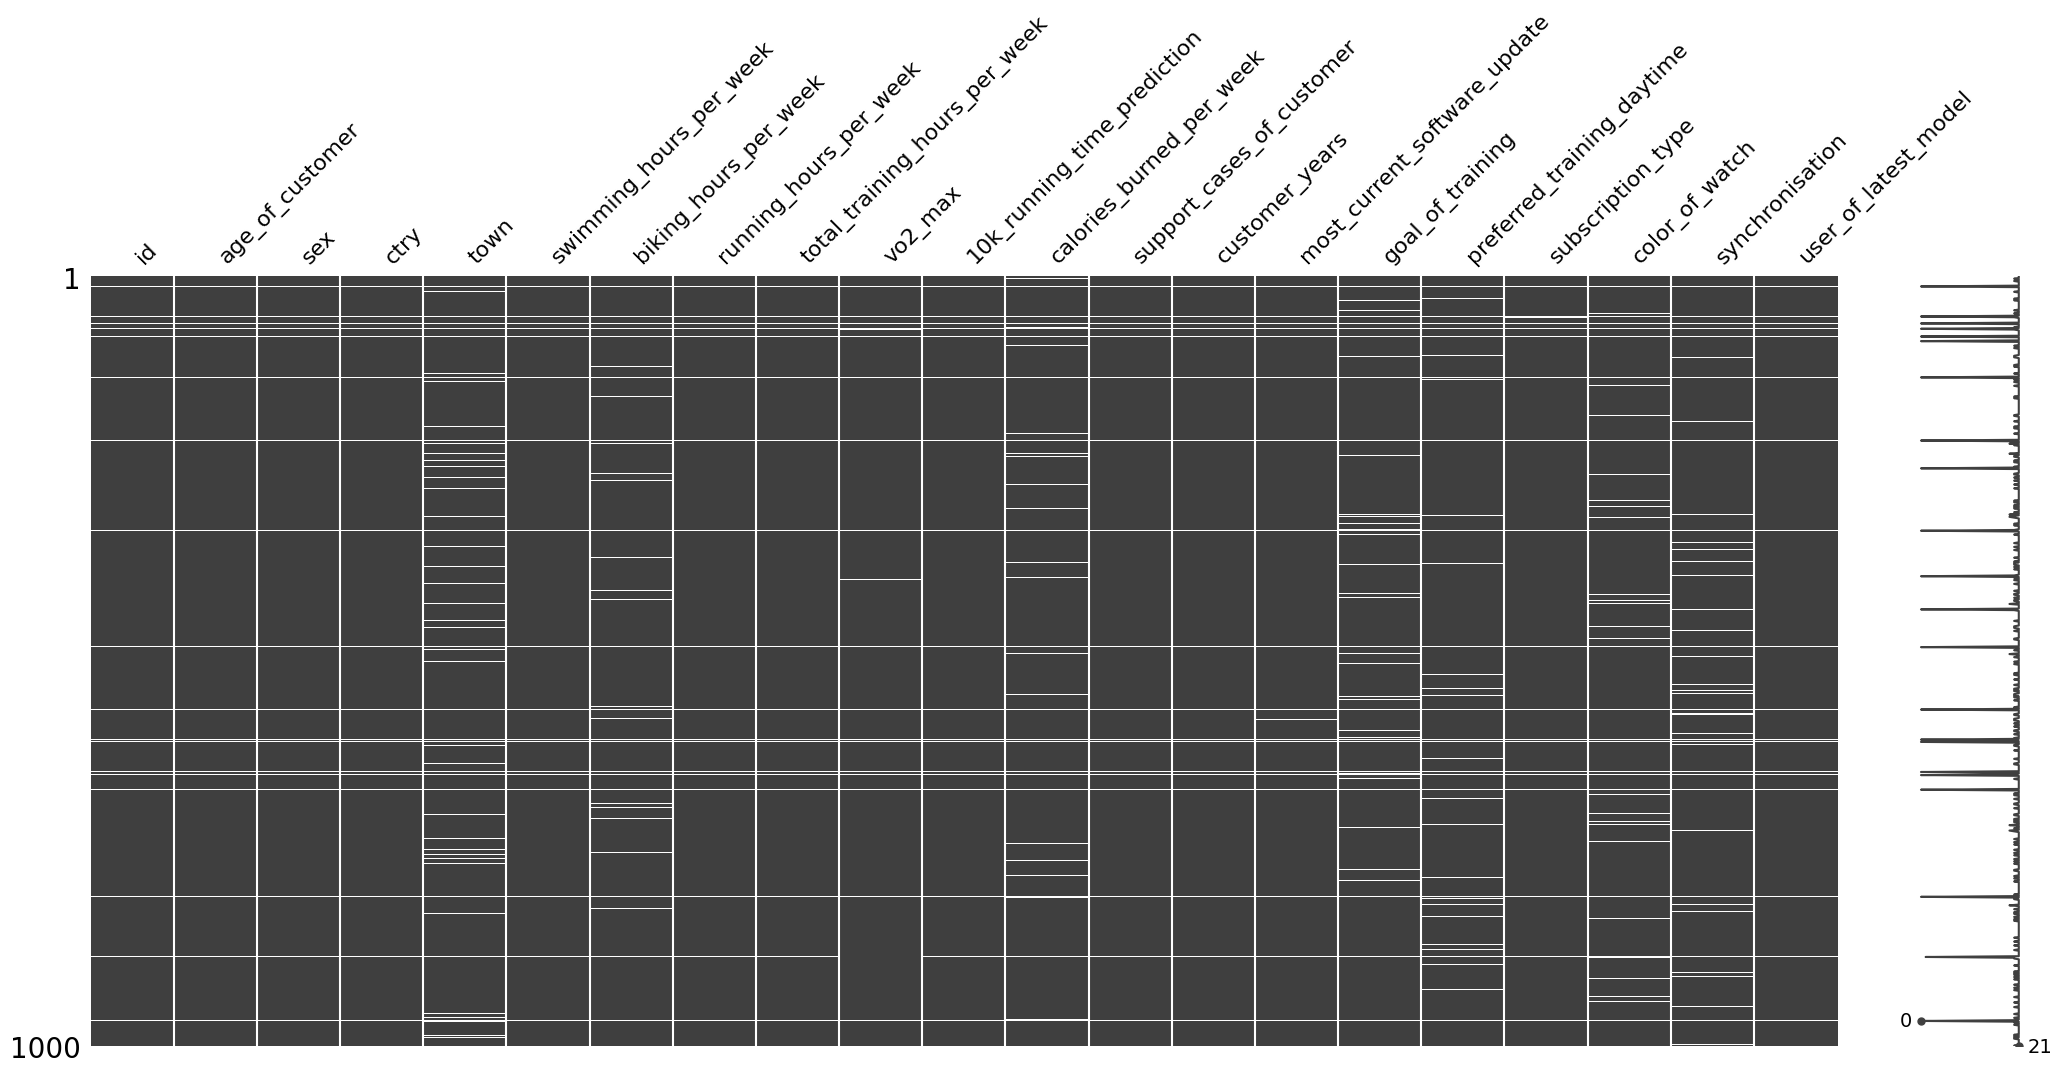

In [6]:
# Check for missing values
msno.matrix(df)

We can oberve that the input dataset provided in the file `triathlon_watch_training_data_final.csv` contains 1000 rows and 21 columns. Using the python package `missingno` we also observe that the are multile missing values. Problematic are the ones which are missing in the target columns `user_of_latest_model`, here we will have to remove them complete them, since there is no way to extrapolate this values. Regarding the missing values of the other columns, there are multiple techniques which will be applied to handle them. 

In [7]:
# Missing values in percentage
prc_missing_values = df.isna().sum()/len(df)*100
avg_missing_values = round(np.mean(prc_missing_values),2)

print("Percentage of missing values per columns")
print(prc_missing_values)
print()
print("Percentage of Average missing values: ", avg_missing_values, " %")

Percentage of missing values per columns
id                               2.2
age_of_customer                  2.2
sex                              2.2
ctry                             2.2
town                             6.1
swimming_hours_per_week          2.2
biking_hours_per_week            4.6
running_hours_per_week           2.2
total_training_hours_per_week    2.2
vo2_max                          2.5
10k_running_time_prediction      2.2
calories_burned_per_week         4.1
support_cases_of_customer        2.2
customer_years                   2.2
most_current_software_update     2.3
goal_of_training                 5.0
preferred_training_daytime       4.6
subscription_type                2.3
color_of_watch                   5.4
synchronisation                  5.0
user_of_latest_model             2.2
dtype: float64

Percentage of Average missing values:  3.15  %


In [8]:
category_columns = list(df.describe(include='object').columns)
category_columns.remove('id')
category_columns.remove('most_current_software_update')
category_columns.remove('synchronisation')
date_columns = ['most_current_software_update']
bool_columns = ['synchronisation']
target_columns = ['user_of_latest_model']
numeric_columns = df.describe().columns
numeric_columns = [x for x in numeric_columns if x not in target_columns]
text_columns = ['id']

print("Category Columns:", category_columns)
print("Date Columns:", date_columns)
print("Boolean Columns:", bool_columns)
print("Numeric Columns:", numeric_columns)
print("Text Columns:", text_columns)
print("Target Columns:", target_columns)

for bool_column in bool_columns:
    df[bool_column] = df[bool_column].map({'Yes': 1, 'No': 0})


Category Columns: ['sex', 'ctry', 'town', 'goal_of_training', 'preferred_training_daytime', 'subscription_type', 'color_of_watch']
Date Columns: ['most_current_software_update']
Boolean Columns: ['synchronisation']
Numeric Columns: ['age_of_customer', 'swimming_hours_per_week', 'biking_hours_per_week', 'running_hours_per_week', 'total_training_hours_per_week', 'vo2_max', '10k_running_time_prediction', 'calories_burned_per_week', 'support_cases_of_customer', 'customer_years']
Text Columns: ['id']
Target Columns: ['user_of_latest_model']


In [9]:
df.filter(numeric_columns).describe()

age_of_customer  swimming_hours_per_week  biking_hours_per_week  \
count       978.000000               978.000000             954.000000   
mean         40.529652                 2.226196               5.529109   
std          14.072180                 1.595254               3.499372   
min          -1.000000                 0.000000               0.000000   
25%          29.000000                 1.020000               2.767500   
50%          41.000000                 2.020000               5.110000   
75%          53.000000                 3.187500               7.870000   
max          64.000000                 9.970000              16.110000   

       running_hours_per_week  total_training_hours_per_week     vo2_max  \
count              978.000000                     978.000000  975.000000   
mean                 3.262219                      11.446155   51.374066   
std                  2.165709                       8.038531   21.459113   
min                  0.000000                       0.150000   10.220000   
25%                  1.635000                       7.380000   42.070000   
50%                  2.930000                      10.220000   53.400000   
75%                  4.600000                      14.097500   60.095000   
max                 11.870000                     100.000000  247.257800   

       10k_running_time_prediction  calories_burned_per_week  \
count                   978.000000                959.000000   
mean                     45.610521               5487.534849   
std                       7.549771               2499.741648   
min                      29.120000                -47.260000   
25%                      40.302500               3661.940000   
50%                      43.885000               5168.410000   
75%                      50.257500               7000.840000   
max                      67.060000              13280.060000   

       support_cases_of_customer  customer_years  
count                 978.000000      978.000000  
mean                    1.956033        3.792434  
std                     1.413167        2.916593  
min                     0.000000        0.000000  
25%                     1.000000        1.000000  
50%                     2.000000        3.000000  
75%                     3.000000        6.000000  
max                     4.000000       11.000000

array([[<Axes: title={'center': 'age_of_customer'}>,
        <Axes: title={'center': 'swimming_hours_per_week'}>,
        <Axes: title={'center': 'biking_hours_per_week'}>],
       [<Axes: title={'center': 'running_hours_per_week'}>,
        <Axes: title={'center': 'total_training_hours_per_week'}>,
        <Axes: title={'center': 'vo2_max'}>],
       [<Axes: title={'center': '10k_running_time_prediction'}>,
        <Axes: title={'center': 'calories_burned_per_week'}>,
        <Axes: title={'center': 'support_cases_of_customer'}>],
       [<Axes: title={'center': 'customer_years'}>,
        <Axes: title={'center': 'synchronisation'}>,
        <Axes: title={'center': 'user_of_latest_model'}>]], dtype=object)

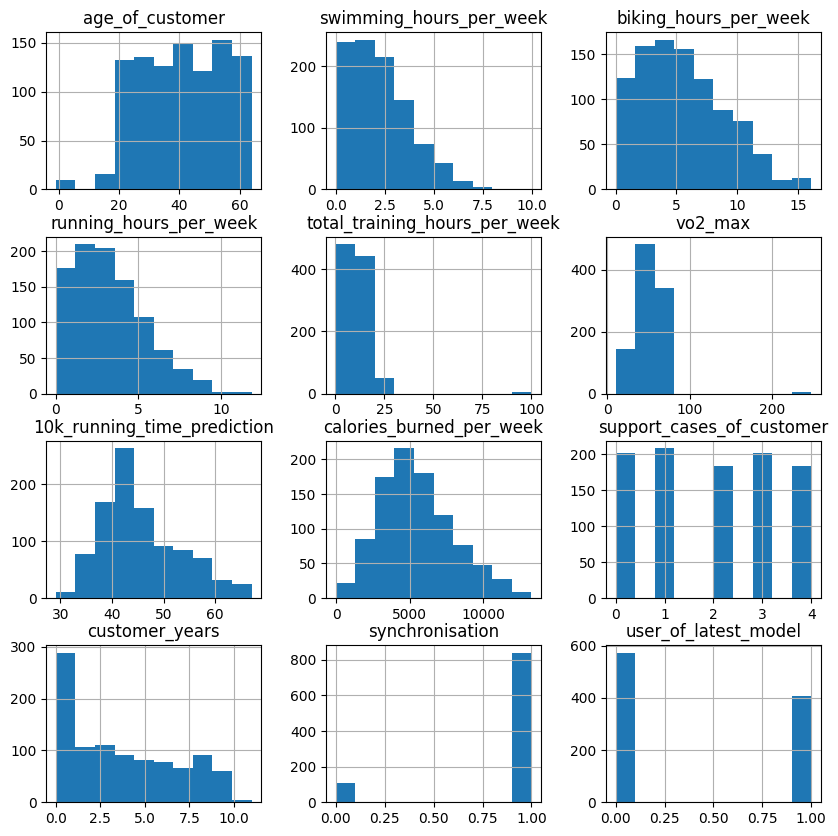

In [10]:
df.hist(figsize=(10,10))

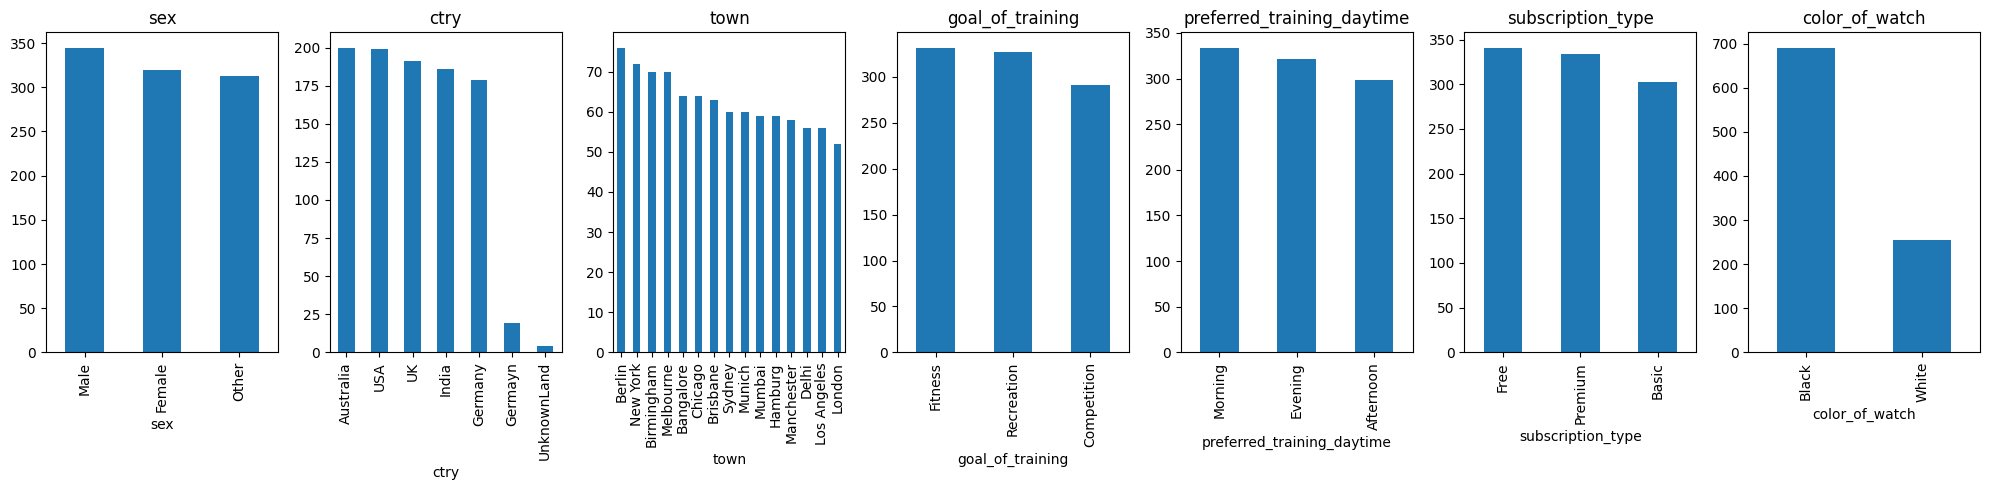

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, len(category_columns), figsize=(20, 5))
for col in category_columns:
    df[col].value_counts().plot(kind='bar', ax=ax[category_columns.index(col)], title=col)
fig.tight_layout()


In [12]:
df.describe(include='object')

id   sex       ctry    town most_current_software_update  \
count     978   978        978     939                          977   
unique    971     3          7      15                          393   
top     C0708  Male  Australia  Berlin                   2023-12-08   
freq        2   345        200      76                            9   

       goal_of_training preferred_training_daytime subscription_type  \
count               950                        954               977   
unique                3                          3                 3   
top             Fitness                    Morning              Free   
freq                332                        334               341   

       color_of_watch  
count             946  
unique              2  
top             Black  
freq              691

**Summary**

- The dataframe contains 20 columns. 
- There are in total 1000 observations.
- The average missing data per column is 3.1%.

- Column Types:
    - **Category Columns**: ['Sex', 'Ctry', 'Town', 'Goal of Training', 'Preferred Training Daytime', 'Subscription Type', 'Color of Watch']
    - **Date Columns**: ['Most current software update']
    - **Boolean Columns**: ['Synchronisation']
    - **Numeric Columns**: ['Age of customer', 'Swimming Hours per Week', 'Biking Hours per Week',
       'Running Hours per Week', 'Total Training Hours per Week', 'VO2 Max',
       '10k Running Time Prediction', 'Calories Burned per Week',
       'Support Cases of Customer', 'Customer Years', 'User of latest model']
    - **Text Columns**: ['ID'] 
    - **Target Columns**: ['User of latest model']

- For the numeric columns only the '10k Running Time Prediction', 'Calories Burned per Week' seem to follow a normal distribution. 
- For the category column Town, there seems to be a data quality issue for the entry "Germany" and "Germanyn". The rest of the category columns seems to have a good representation of data points per category, i.e. no imbalance datasets.
- The variables 'total_training_hours_per_week' and 'vo2_max' show a right skew distribution which might point out the presence of outliers. 



# Preprocessing Logic

After every preprocessing step, we will save the data to a new file. So that we can analyze the effect of each preprocessing step on the model performance. The preprocessing steps will be the following:

Every step will inclue the final sub-step **Convert category columns to one hot enconding**, so that the data is ready to be trained with the model. 

- Step 0: No Preprocessing, no data quality.
    - Drop all NAs. 
- Step 1: Data Quality 
    - Fix grammar error in column "Ctry" (Germayn -> Germany)
- Step 2: Data Imputation 
    - All of the steps in Step 1. 
    - Deletion of entries with missing values in the target colunm
    - Listwise deletion (all rows with multiple missing values, more than 2)
    - Imputation for numerical columns
    - Outlier Cleaning
    - Imputation for categorical columns
        - Imputation using mode
        - Imputation using Predictive model
- Step 3: Data Normalization
    - All of the steps in Step 2. 
    - Normality Check & Quantile Transformation
- Step 4: Feature Engineering
    - All of the steps in Step 3. 
    - Combination of Features
    - Multicoliniarity Test for Feature Selection
- Step 5: Dimensionality Reduction
    - All of the steps in Step 4, except the Multicoliniarity Test
    - Apply PCA and keep 95% of variance
- Step 6: Feature Selection 
- Step 7: Feature Augmentation - SMOTE
    - SMOTE: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html

## Step 0: No Preprocessing

<Axes: >

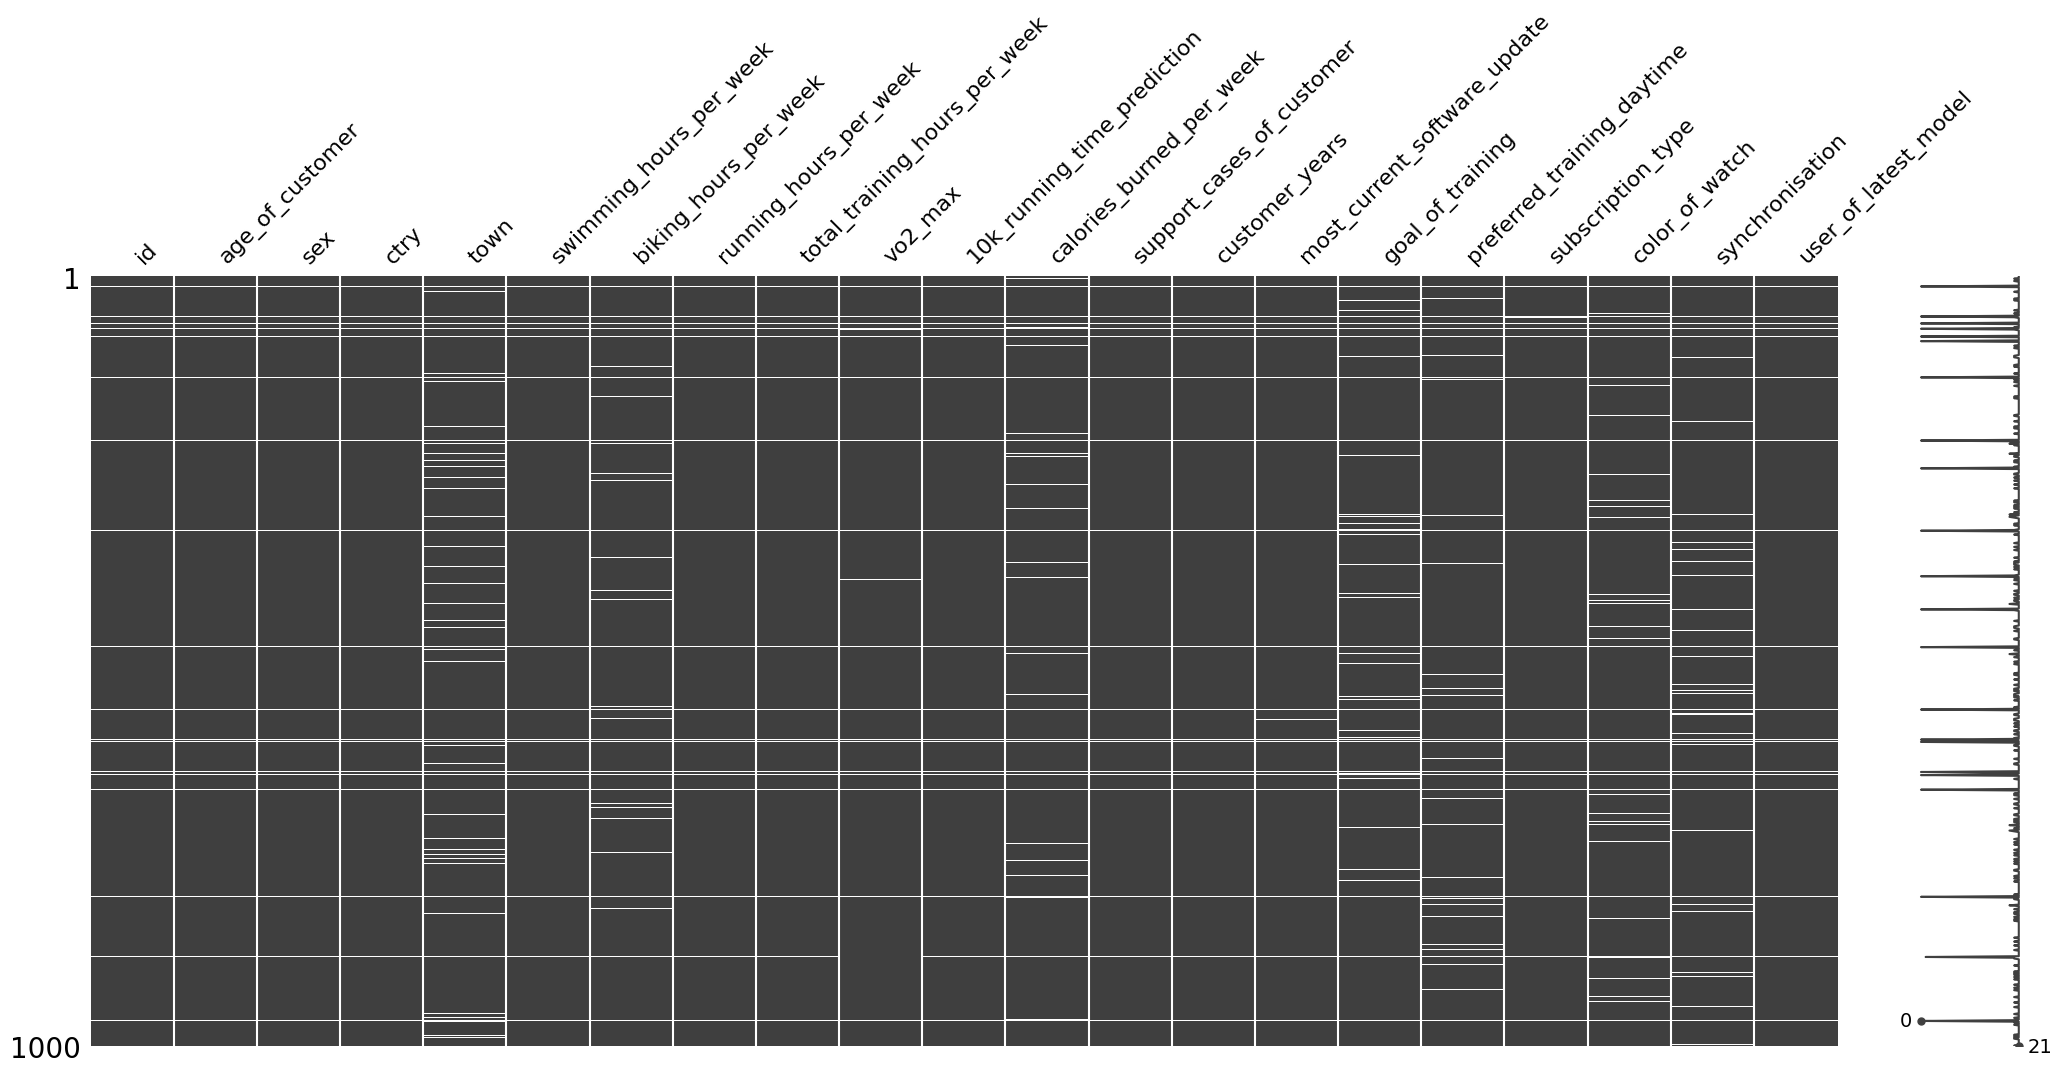

In [13]:
msno.matrix(df)

In [14]:
# Dataframe for step 0
df_step_0 = df.copy()

In [15]:
# Drop all na values
df_step_0 = df_step_0.dropna()

# Convert category columns to one hot encoding
df_hot_encoded_feat = pd.get_dummies(df_step_0.filter(category_columns), 
                                     columns=category_columns, drop_first=True, 
                                     prefix="hot_enc_", dtype=int)
df_step_0 = pd.concat([df_step_0, df_hot_encoded_feat], axis=1)
df_step_0 = df_step_0.drop(category_columns + text_columns, axis=1)

<Axes: >

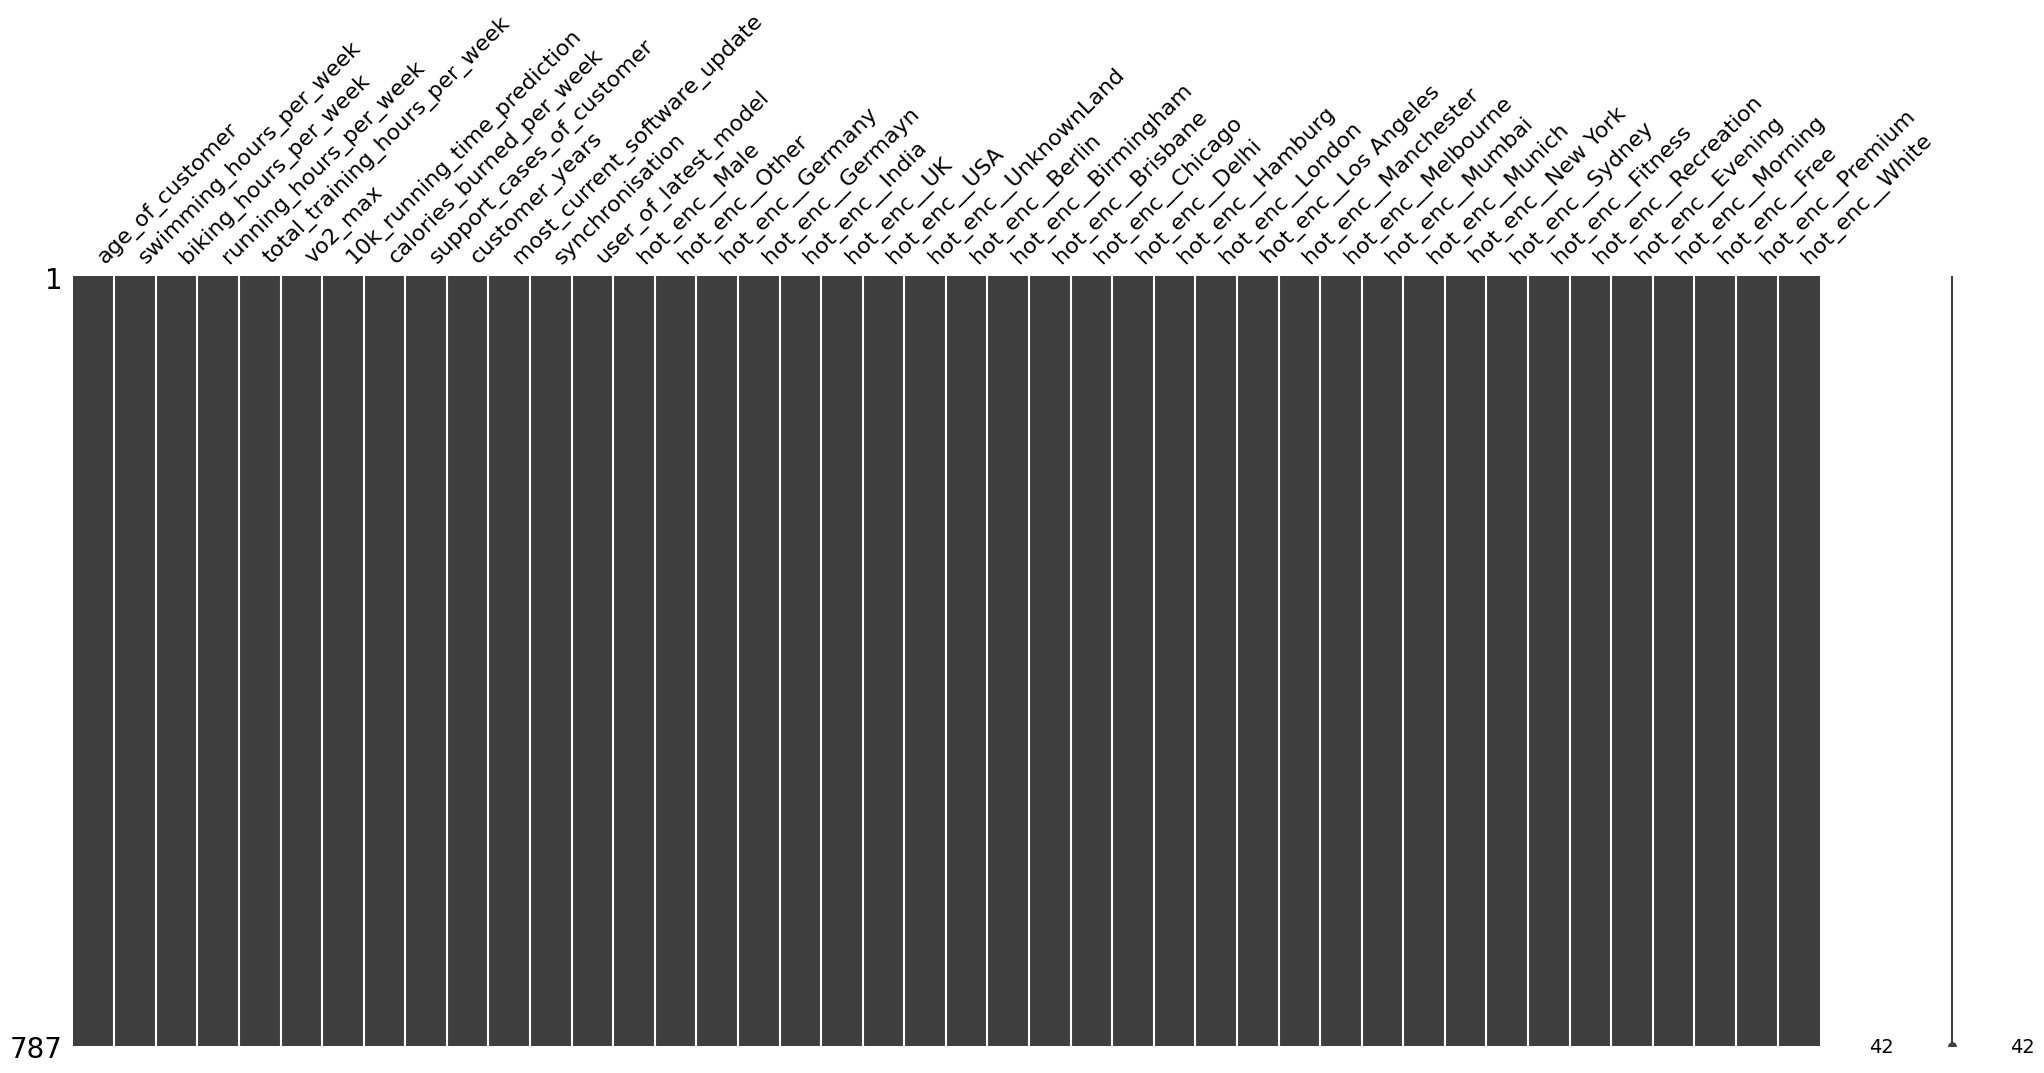

In [16]:
msno.matrix(df_step_0)

In [17]:
df_step_0.shape

(787, 42)

In [18]:
assert df_step_0.isnull().sum().sum() == 0, "There are still missing values in the dataset"
data_loss = (df.shape[0] - df_step_0.shape[0])*100/(df.shape[0])
print("Data loss Step 0: ", data_loss, "%")
df_step_0.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john_prep_0.csv", index=False)

Data loss Step 0:  21.3 %


Step 0 results in a final dataframe of 787 rows and 42 columns. That is we lost 21.3% of the training data. 

## Step 1: Data Quality

### Fix grammar error in column "Ctry"

In [19]:
df_step_1 = df.copy()

# Check Countries distribution
df_step_1['ctry'].value_counts()

ctry
Australia      200
USA            199
UK             191
India          186
Germany        179
Germayn         19
UnknownLand      4
Name: count, dtype: int64

In [20]:
# Fix data quality issue
df_step_1['ctry'] = df_step_1['ctry'].replace('Germayn', 'Germany')
df_step_1['ctry'].value_counts()

ctry
Australia      200
USA            199
Germany        198
UK             191
India          186
UnknownLand      4
Name: count, dtype: int64

In [21]:
# Drop all na values
df_step_1 = df_step_1.dropna()

# Convert category columns to one hot encoding
df_hot_encoded_feat = pd.get_dummies(df_step_1.filter(category_columns), 
                                     columns=category_columns, drop_first=True, 
                                     prefix="hot_enc_", dtype=int)
df_step_1 = pd.concat([df_step_1, df_hot_encoded_feat], axis=1)
df_step_1 = df_step_1.drop(category_columns + text_columns, axis=1)

<Axes: >

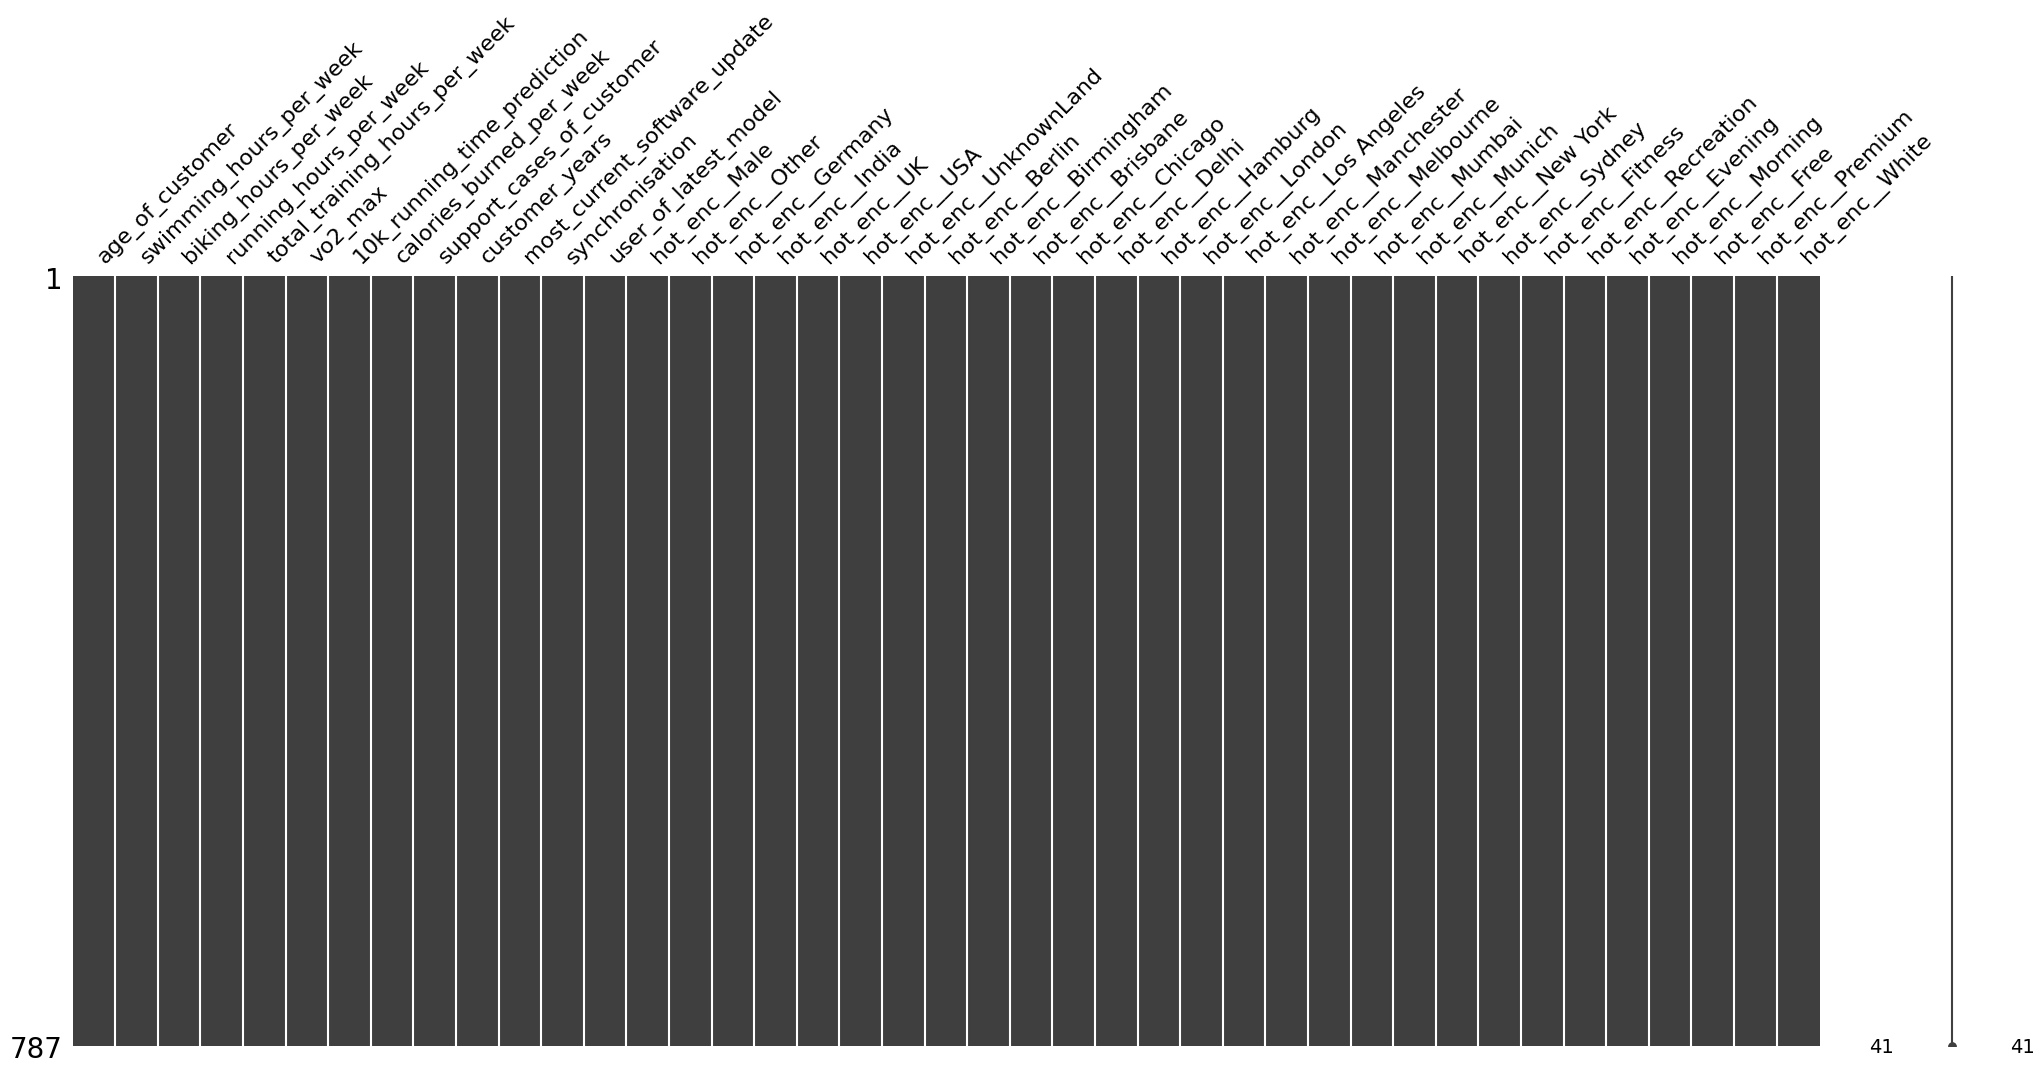

In [22]:
msno.matrix(df_step_1)

In [23]:
df_step_1.shape

(787, 41)

In [24]:
assert df_step_1.isnull().sum().sum() == 0, "There are still missing values in the dataset"
data_loss = (df.shape[0] - df_step_1.shape[0])*100/(df.shape[0])
print("Data loss Step 0: ", data_loss, "%")
df_step_1.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john_prep_1.csv", index=False)

Data loss Step 0:  21.3 %


Step 1 results in a final dataframe of 787 rows and 41 columns. That is we lost 21.3% of the training data. 

## Step 2: Data Imputation

<Axes: >

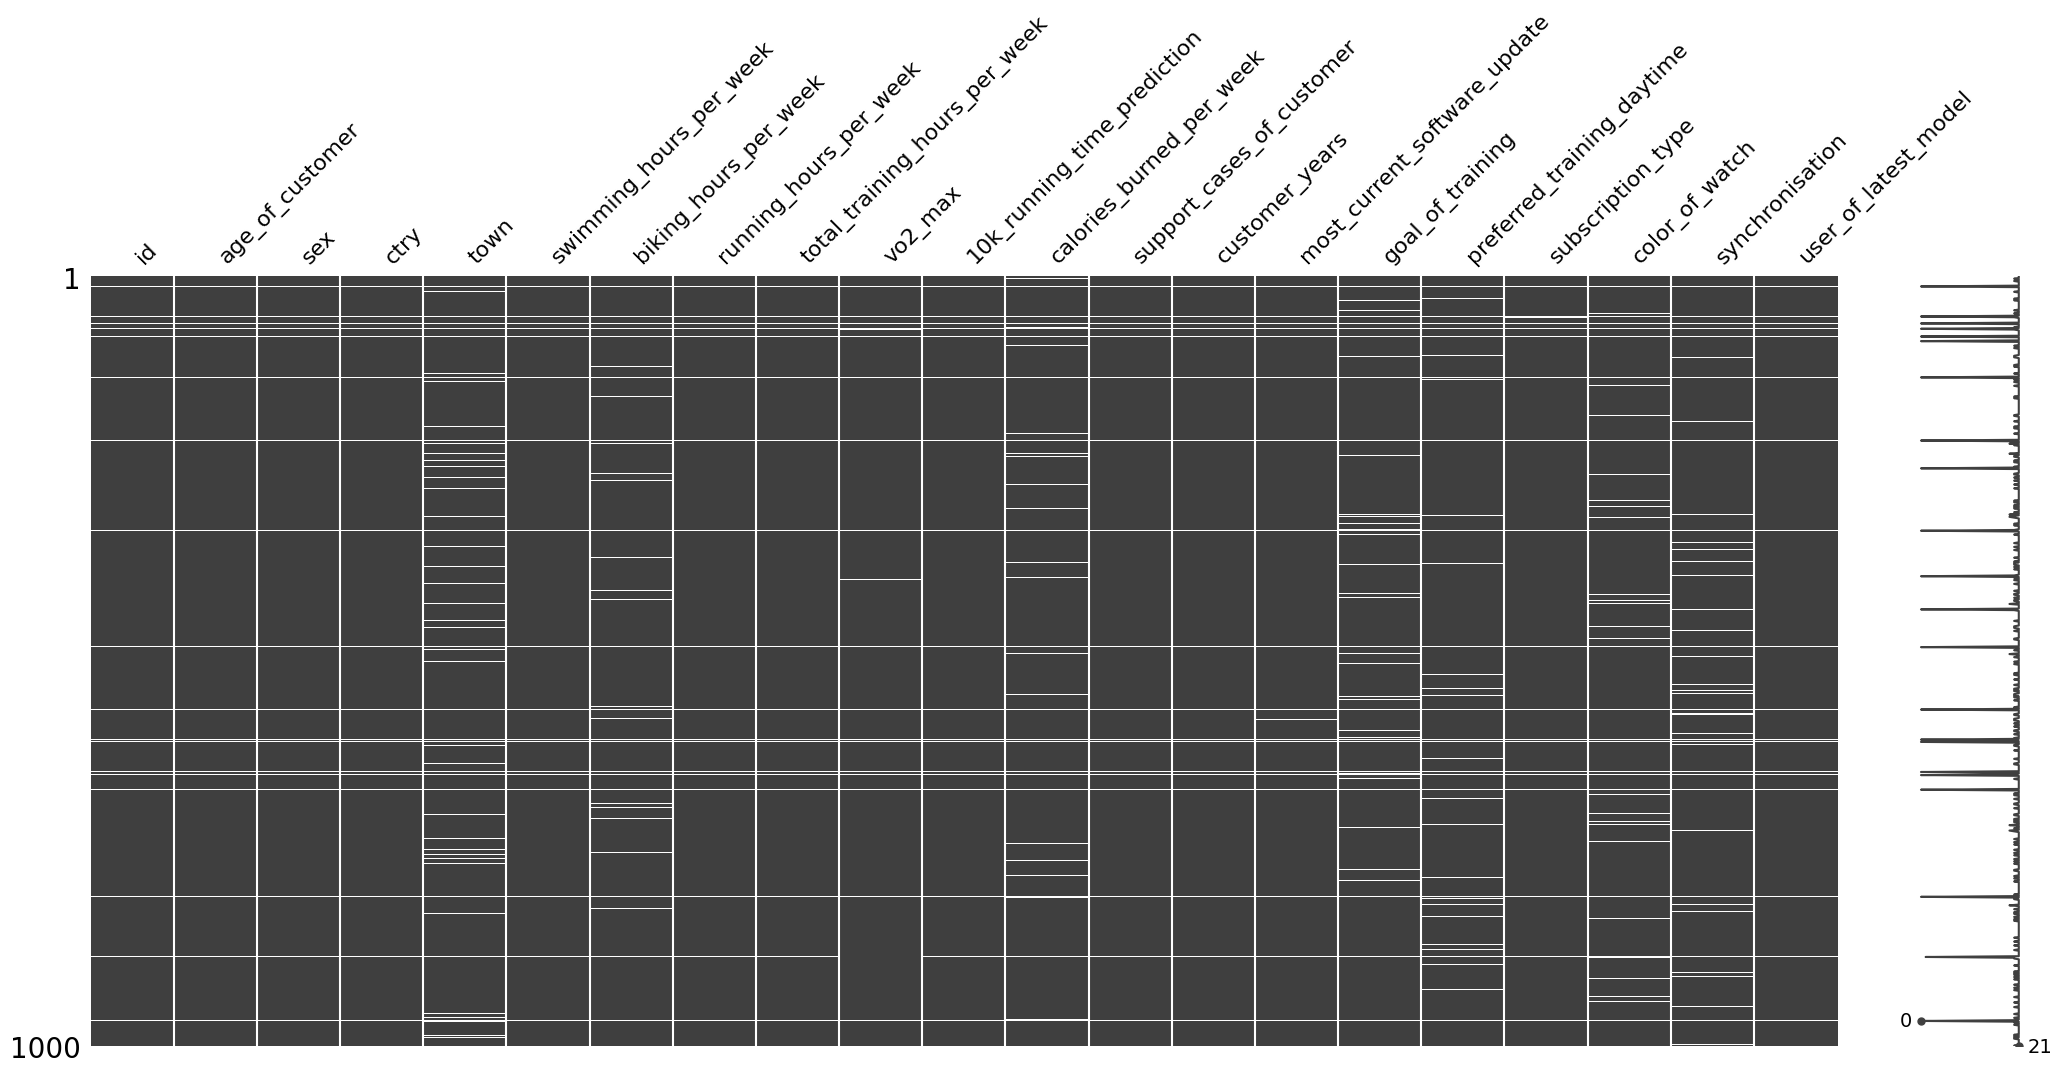

In [25]:
df_step_2 = df.copy()

# Apply Data Quality Step
df_step_2['ctry'] = df_step_2['ctry'].replace('Germayn', 'Germany')

msno.matrix(df_step_2)

### Deletion of entries with missing values in the target colunm

<Axes: >

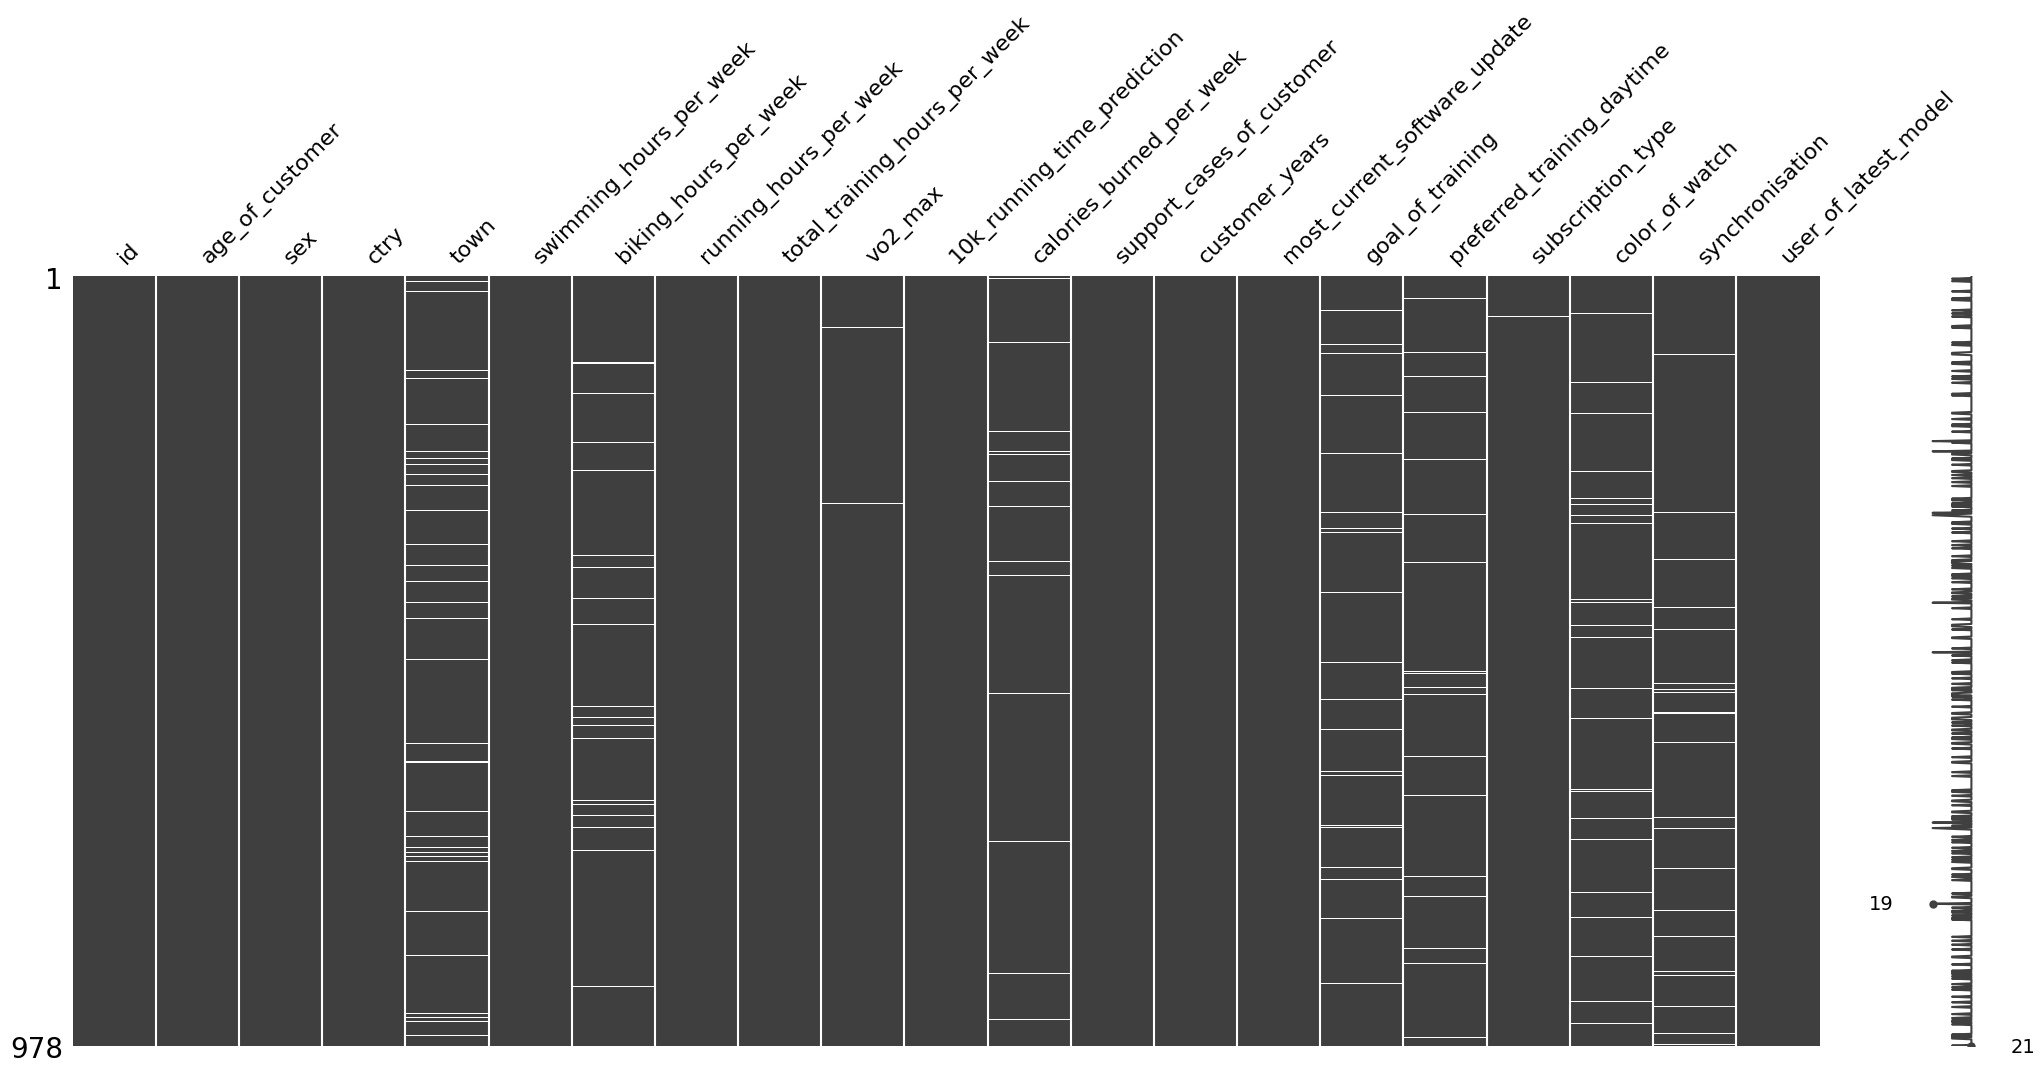

In [26]:
df_step_2=df_step_2.drop(df_step_2[df_step_2[target_columns[0]].isnull()].index)
msno.matrix(df_step_2)

### Listwise deletion (all rows with multiple missing values, more than 2)

<Axes: >

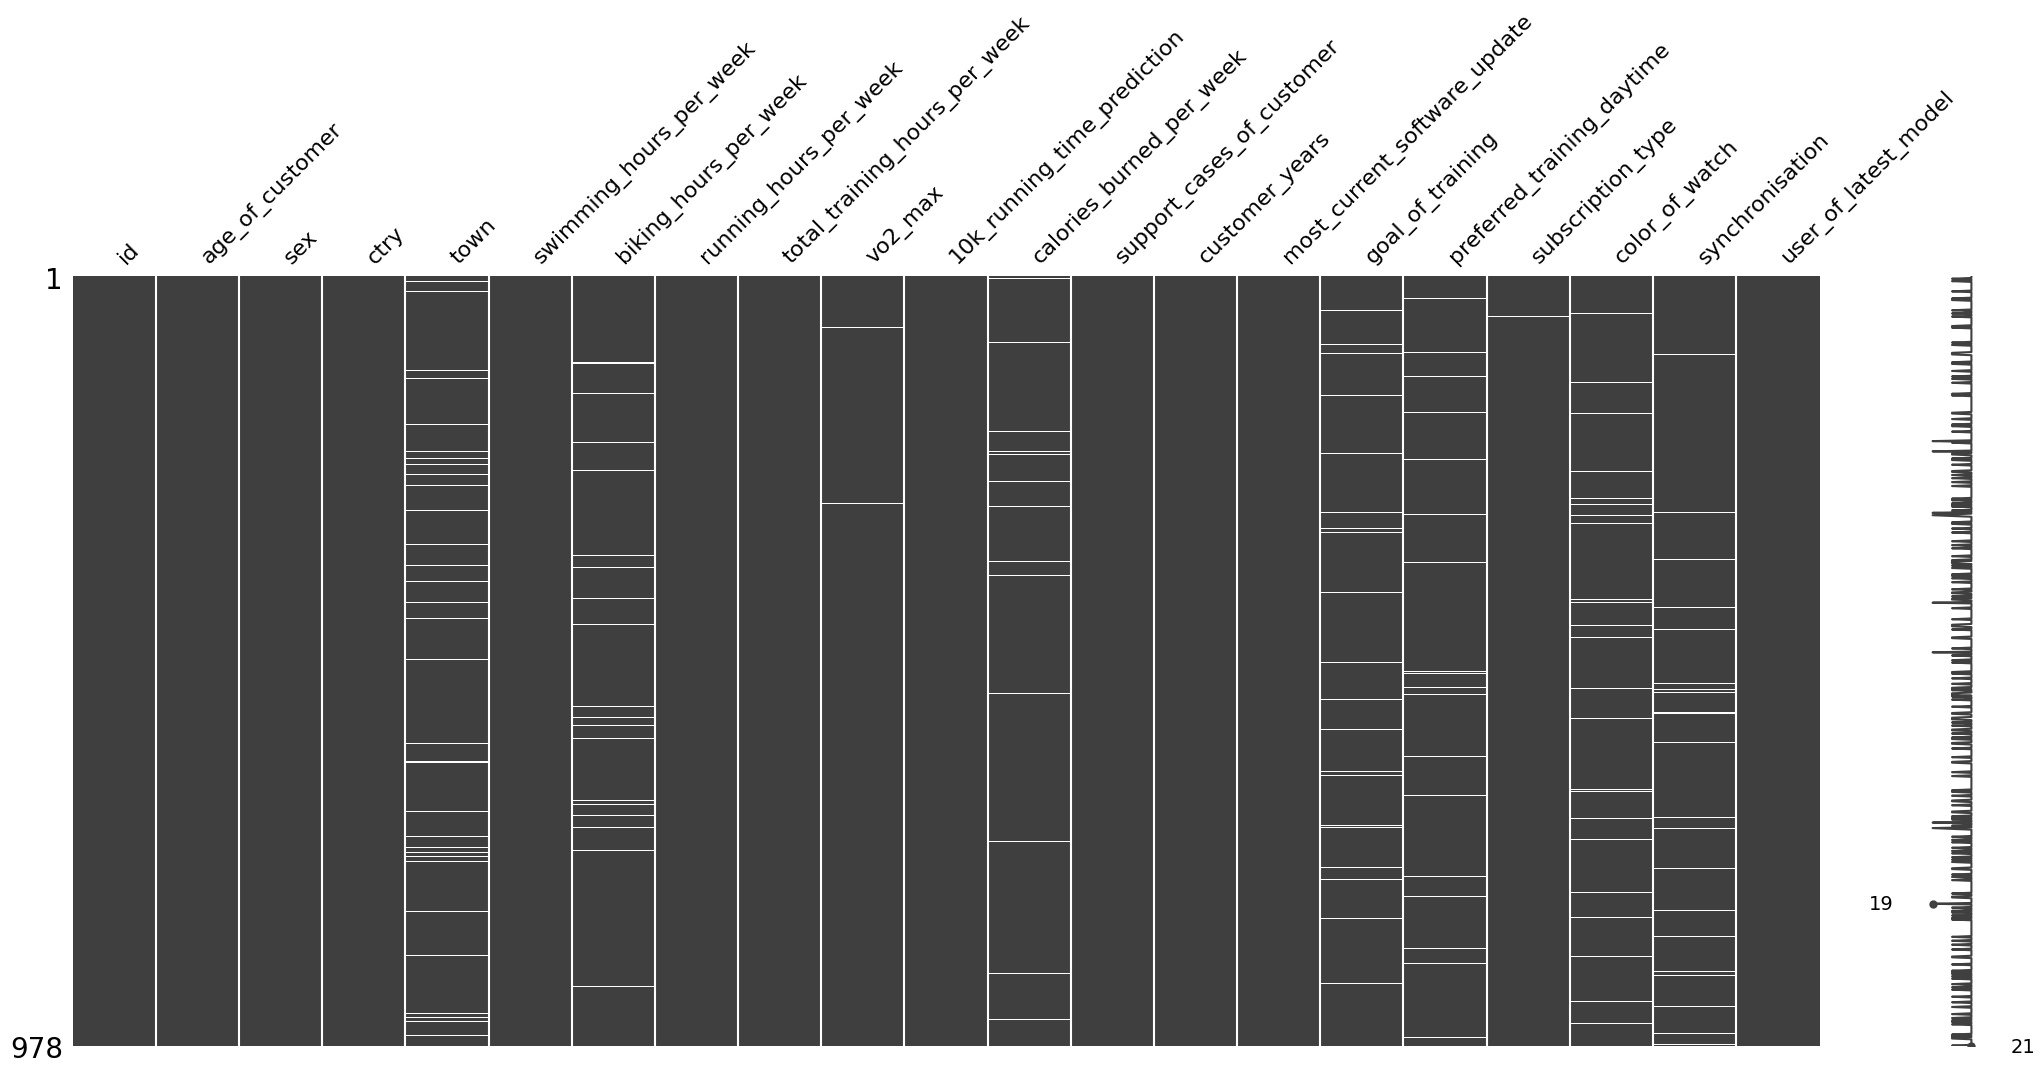

In [27]:
df_step_2=df_step_2.drop(df_step_2[df_step_2.isnull().sum(axis=1)>2].index)
msno.matrix(df_step_2)

### Imputation for numerical columns

1) Idenfity Outliers using the IQR method. 
2) Use median imputation for missing values after cleaning outliers. 

In [28]:
def impute_numeric_missing_values(df: pd.DataFrame, numeric_columns: list[str]) -> pd.DataFrame:
    """Impute numeric missing values using IQR method
    to first identify outliers and then replace them with median

    Args:
        df (pd.DataFrame): input dataframe
        numeric_columns (list[str]): numeric columns

    Returns:
        pd.DataFrame: cleaned dataframe
    """
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        df[col] = df[col].mask(outliers, np.nan)
        df[col] = df[col].fillna(df[col].median())
    return df

In [29]:
df_step_2 = impute_numeric_missing_values(df_step_2, numeric_columns)
assert df_step_2.filter(numeric_columns).isnull().sum().sum() == 0, "There numeric columns with missing values"

<Axes: >

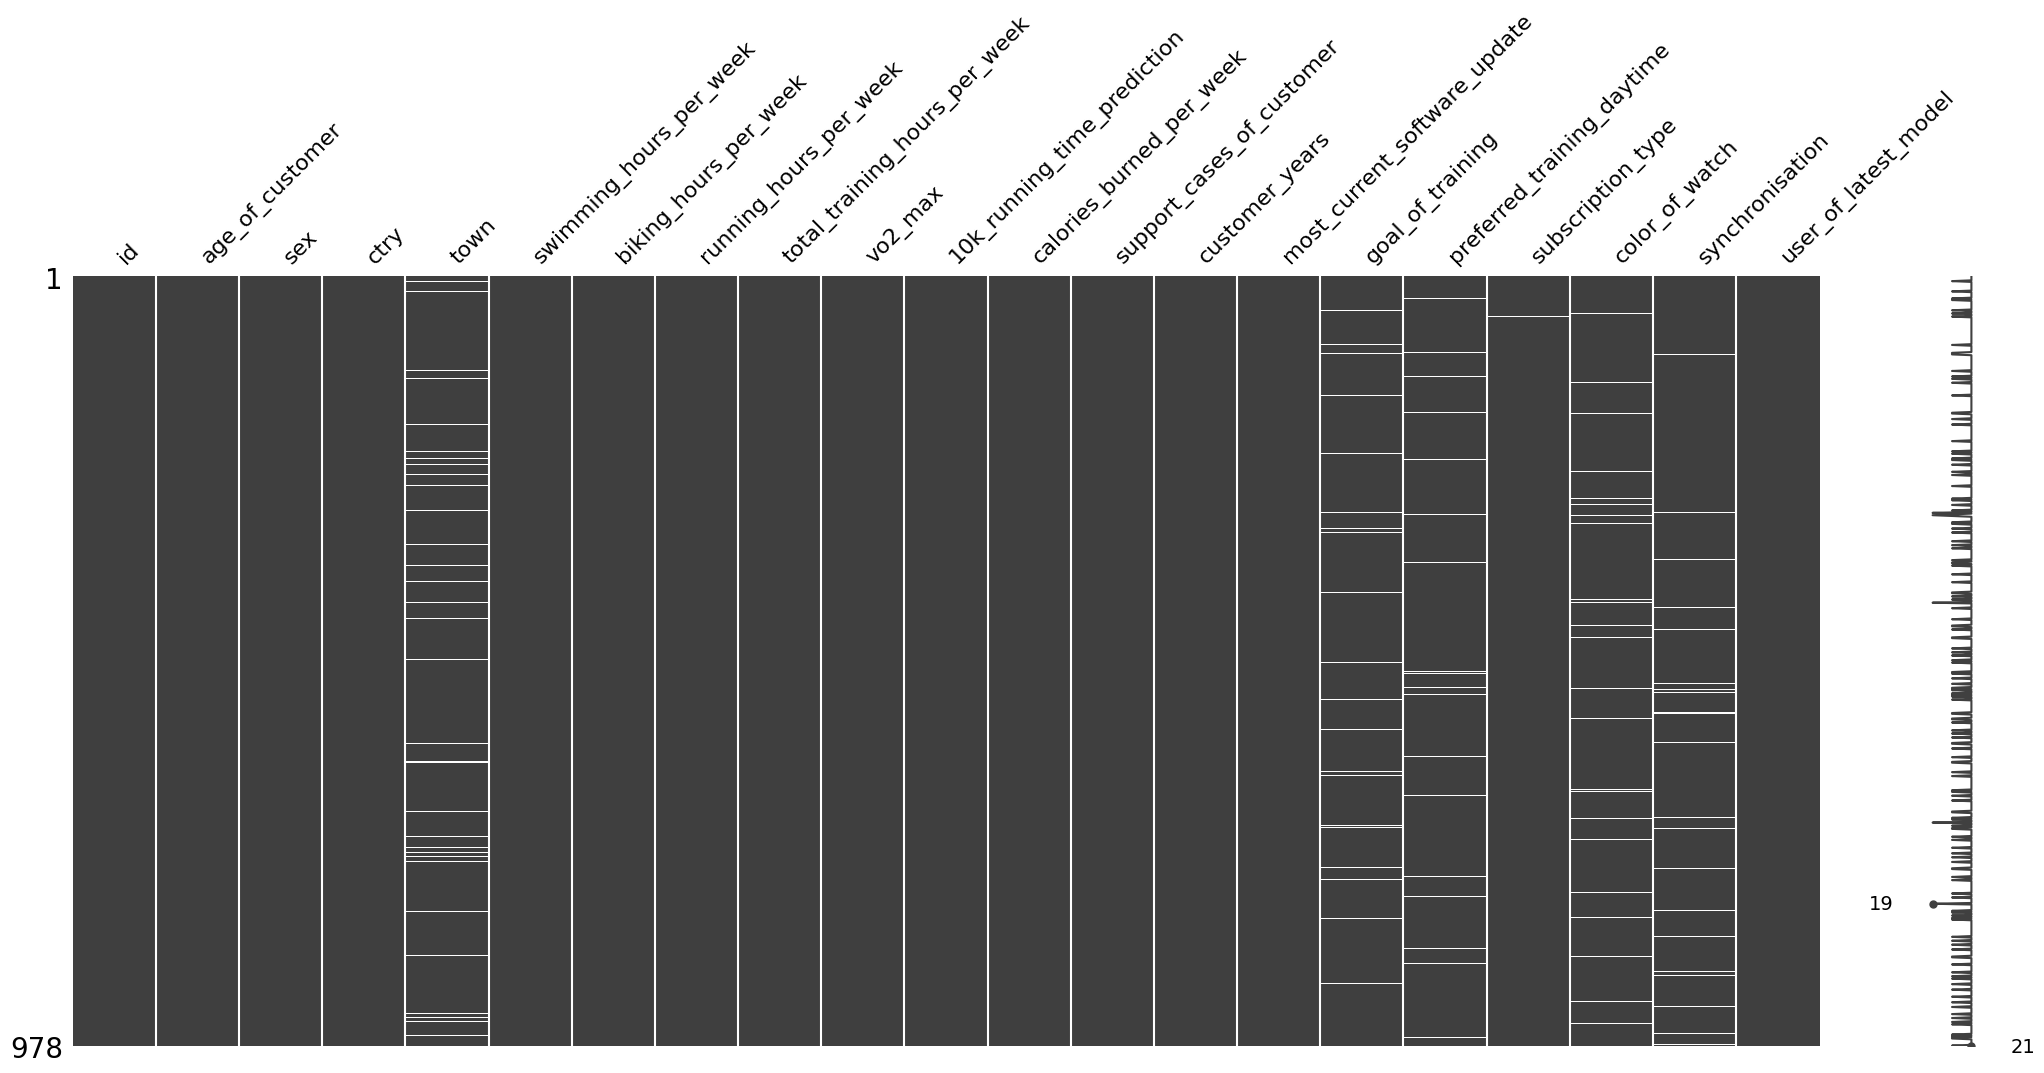

In [30]:
msno.matrix(df_step_2)

### Imputation for Category Columns

The categorical columns `synchronisation`, `subscription_type`, `color_of_watch`, `subscription_type`, `preferred_training_daytime`, `goal_of_training` and `town` contain missing values. In order to keep the bias to the minimum there are multiple approaches to inpute the missing values for categorical columns: 

**Use the Mode (Most Frequent Category)**:
    - How it works: Replace missing values with the most frequent category in the column.
	- Pros: Simple and computationally efficient.
	- Cons: May introduce bias if the most frequent category is overrepresented.
	- Best Use Case: When the column has a clear dominant category

**Random Imputation from Existing Categories**
	•	How it works: Randomly assign a value from the existing categories (weighted by their distribution).
	•	Pros: Preserves the original distribution and reduces bias.
	•	Cons: Could introduce noise if the data has underlying relationships.
	•	Best Use Case: When preserving category proportions is essential

**Predictive Imputation**
	•	How it works: Use a machine learning model (e.g., logistic regression, decision tree) to predict the missing values based on other features.
	•	Pros: Incorporates relationships with other variables, potentially improving accuracy.
	•	Cons: Computationally intensive and may overfit, especially with small datasets.
	•	Best Use Case: When other features provide strong signals for the missing values

**K-Nearest Neighbors (KNN) Imputation**
	•	How it works: Assign the most frequent category among the k-nearest neighbors (based on feature similarity).
	•	Pros: Preserves local patterns in the data.
	•	Cons: Computationally expensive and sensitive to distance metrics.
	•	Best Use Case: When the data has clusters or local structure

**Custom Category for Missing Values**
	•	How it works: Create a new category, such as “Unknown” or “Missing.”
	•	Pros: Keeps the missing values identifiable and avoids assumptions.
	•	Cons: Can introduce a new, potentially non-informative category that might affect models.
	•	Best Use Case: When missing values are meaningful (e.g., indicating a lack of information).

Based on the different approached, we have proceed as following: 

1. Apply Imputation using mode for the categorical features. 
2. Apply Imputation using a predictive model for the column **synchronisation**, since it we will see that the p-value for the chi-squared test with the column **preferred_training_daytime** is lower than 0.05.

In [31]:
def calculate_prc_missing_values_category_cols(df: pd.DataFrame, 
                                               all_category_columns: list[str]) -> pd.Series:
    """Calculate the percentage of missing values in the category columns

    Args:
        df (pd.DataFrame): input dataframe
        all_category_columns (list[str]): category columns list

    Returns:
        pd.Series: percentage of missing values
    """
    _df_category = df[all_category_columns]
    prc_missing_values = _df_category.isna().sum()/len(df)*100
    return prc_missing_values

# Missing values in percentage
all_category_columns = category_columns + text_columns + bool_columns
prc_missing_values = calculate_prc_missing_values_category_cols(df_step_2, all_category_columns)
print(prc_missing_values)

sex                           0.000000
ctry                          0.000000
town                          3.987730
goal_of_training              2.862986
preferred_training_daytime    2.453988
subscription_type             0.102249
color_of_watch                3.271984
id                            0.000000
synchronisation               2.862986
dtype: float64


#### Imputation using mode

In [32]:
cols_to_impute = category_columns + text_columns
for col in cols_to_impute:
        print("Impute missing values in column: ", col, " with mode")
        df_step_2[col] = df_step_2[col].fillna(df_step_2[col].mode()[0])

Impute missing values in column:  sex  with mode
Impute missing values in column:  ctry  with mode
Impute missing values in column:  town  with mode
Impute missing values in column:  goal_of_training  with mode
Impute missing values in column:  preferred_training_daytime  with mode
Impute missing values in column:  subscription_type  with mode
Impute missing values in column:  color_of_watch  with mode
Impute missing values in column:  id  with mode


In [33]:
prc_missing_values = calculate_prc_missing_values_category_cols(df_step_2, all_category_columns)
print(prc_missing_values)

sex                           0.000000
ctry                          0.000000
town                          0.000000
goal_of_training              0.000000
preferred_training_daytime    0.000000
subscription_type             0.000000
color_of_watch                0.000000
id                            0.000000
synchronisation               2.862986
dtype: float64


#### Imputation using Predictive Model

**Imputation using Predictive Model for column `synchronization`**

The categorical columns left are **town** and **color_of_watch**. They both have more than 3% of missing values. We will use a predictive model to impute the values.

For that we will use the chi-squared test for the categorical columns. In this case we are looking for **p-values < 0.05**. 

<Axes: >

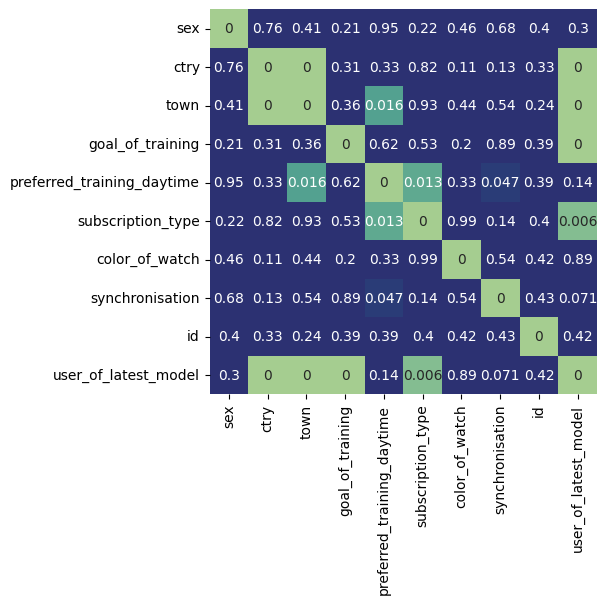

In [34]:
# perform chi-squared test for nominal features
columns = category_columns + bool_columns + text_columns + target_columns

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=columns, columns=columns)
for i in columns:
    for j in columns:
        df_chi2 = df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p
        
#display chi2 p-values as a color coded heatmap with a threshold of 0.05, round p-values to 2 digits
plt.figure(figsize=(5,5))
sns.heatmap(round(chi2_values.astype(float),3), annot=True, cmap='crest', cbar=False, vmin=0, vmax=0.05)

<Axes: >

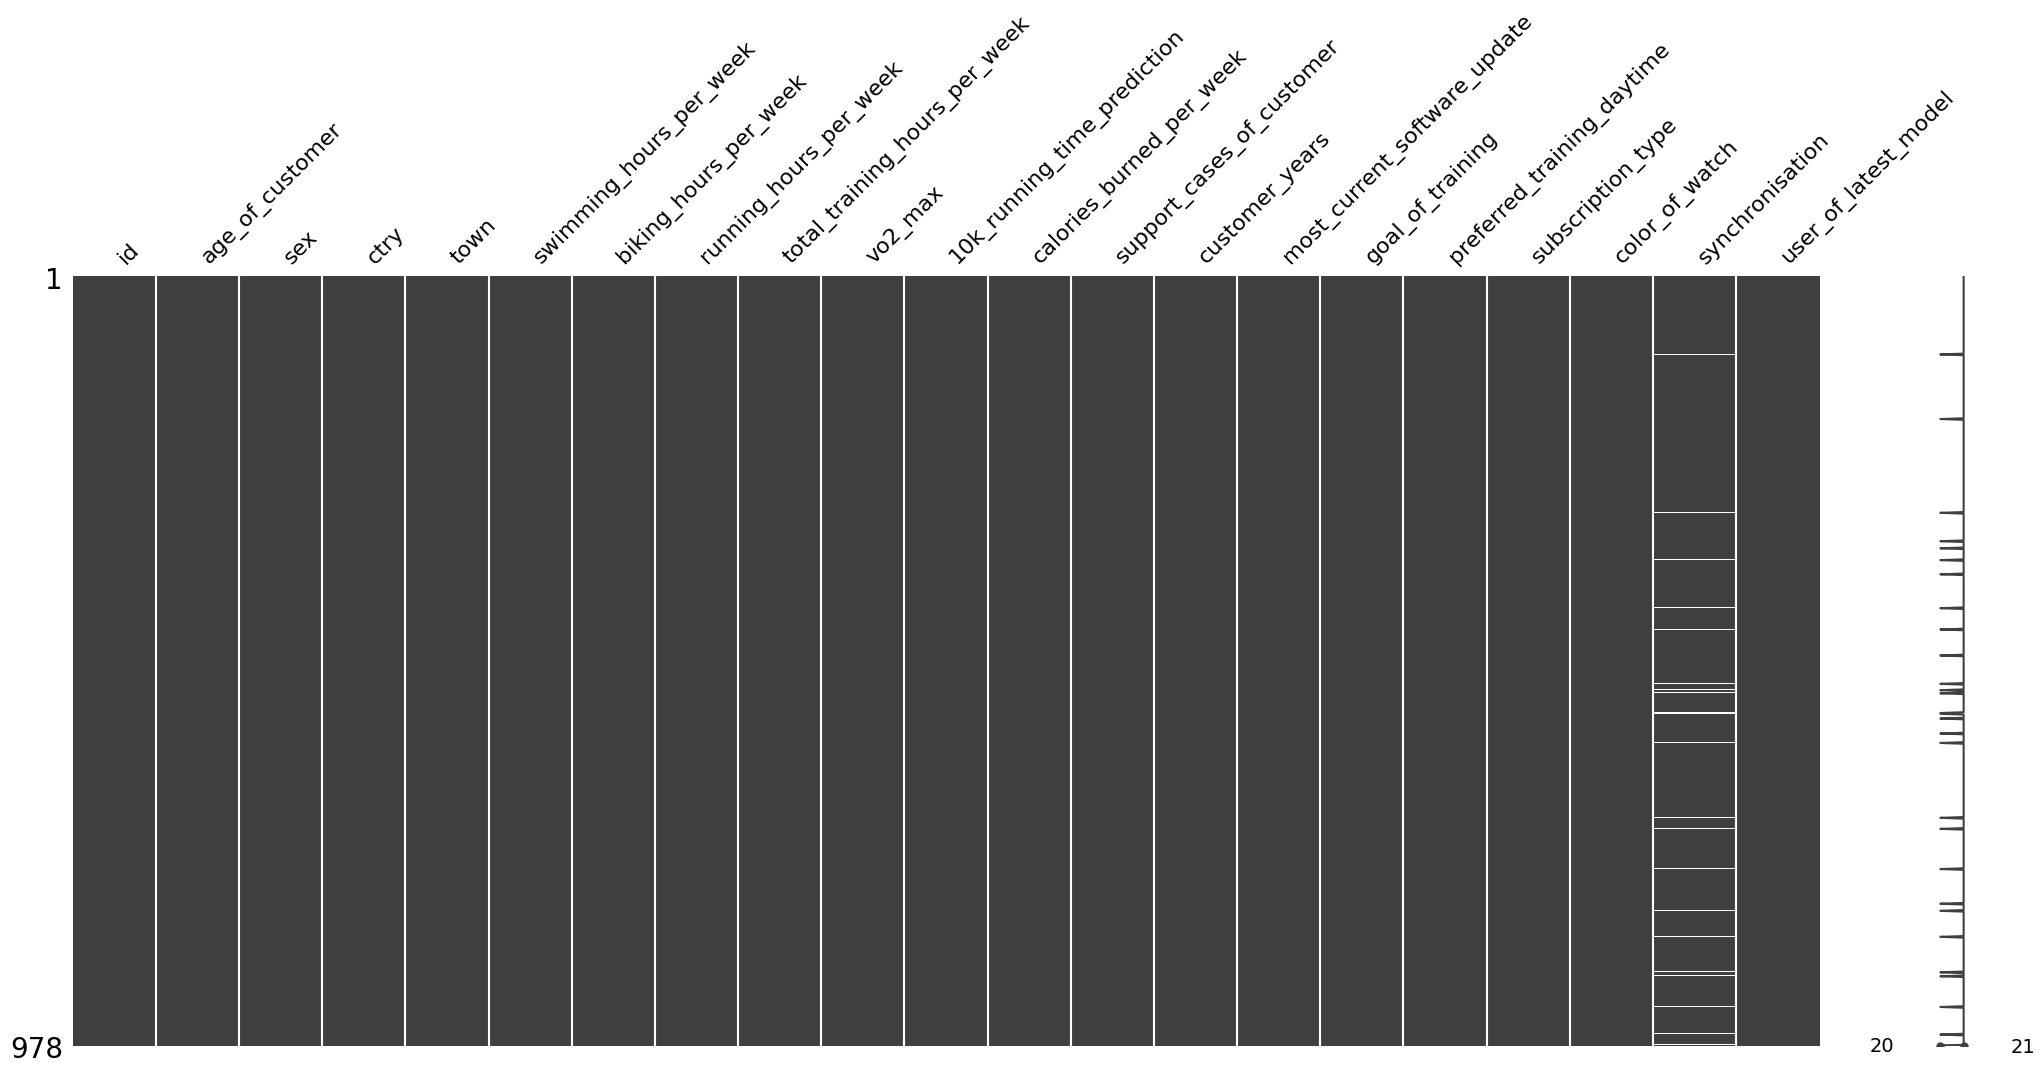

In [35]:
msno.matrix(df_step_2)


Based on the previous chi-squared analysis we can use the variable `preferred_training_daytime` as a predictor for the variable `synchronisation`, since the p-value is lower than 0.05. For this we transform the categorical values of the predictor columns to one-hot encoded values and use a LogisticRegression model. 

In [36]:
from sklearn.linear_model import LogisticRegression

def impute_missing_values_logistic_regression(df: pd.DataFrame, 
                                              prediction_rules: dict[str, list[str]]) -> pd.DataFrame:
    """Impute missing values using Logistic Regression for a categorical boolean column, using
    a categorical column as the target column.

    Args:
        df (pd.DataFrame): _description_
        prediction_rules (dict[str, list[str]]): target column and prediction columns

    Returns:
        pd.DataFrame: imputed dataframe
    """
    for target, pred_cols in prediction_rules.items():
        print("Impute missing values in column:", target, "using", pred_cols)
        _df = df[[target]+ pred_cols].dropna()
        X, y = pd.get_dummies(_df[pred_cols], drop_first=True, dtype=int), _df[target].astype(bool)
        model = LogisticRegression()
        model.fit(X, y)
        df[target] = np.where(df[target].isnull(), 
                            model.predict(pd.get_dummies(df[pred_cols], 
                                                        drop_first=True)), df[target])
    return df

prediction_rules = {'synchronisation': ['preferred_training_daytime']}
df_step_2 = impute_missing_values_logistic_regression(df_step_2, prediction_rules)

Impute missing values in column: synchronisation using ['preferred_training_daytime']


In [37]:
df_step_2.isnull().sum()

id                               0
age_of_customer                  0
sex                              0
ctry                             0
town                             0
swimming_hours_per_week          0
biking_hours_per_week            0
running_hours_per_week           0
total_training_hours_per_week    0
vo2_max                          0
10k_running_time_prediction      0
calories_burned_per_week         0
support_cases_of_customer        0
customer_years                   0
most_current_software_update     1
goal_of_training                 0
preferred_training_daytime       0
subscription_type                0
color_of_watch                   0
synchronisation                  0
user_of_latest_model             0
dtype: int64

After imputing all the categorical columnss, there is still missing values in the column **most_current_software_update**. Since, it only represents one sigle data point, we can treat it as a categorical column and fill it with the most common value. 

In [38]:
cols_to_impute = date_columns
for col in cols_to_impute:
        print("Impute missing values in column: ", col, " with mode")
        df_step_2[col] = df_step_2[col].fillna(df_step_2[col].mode()[0])

Impute missing values in column:  most_current_software_update  with mode


<Axes: >

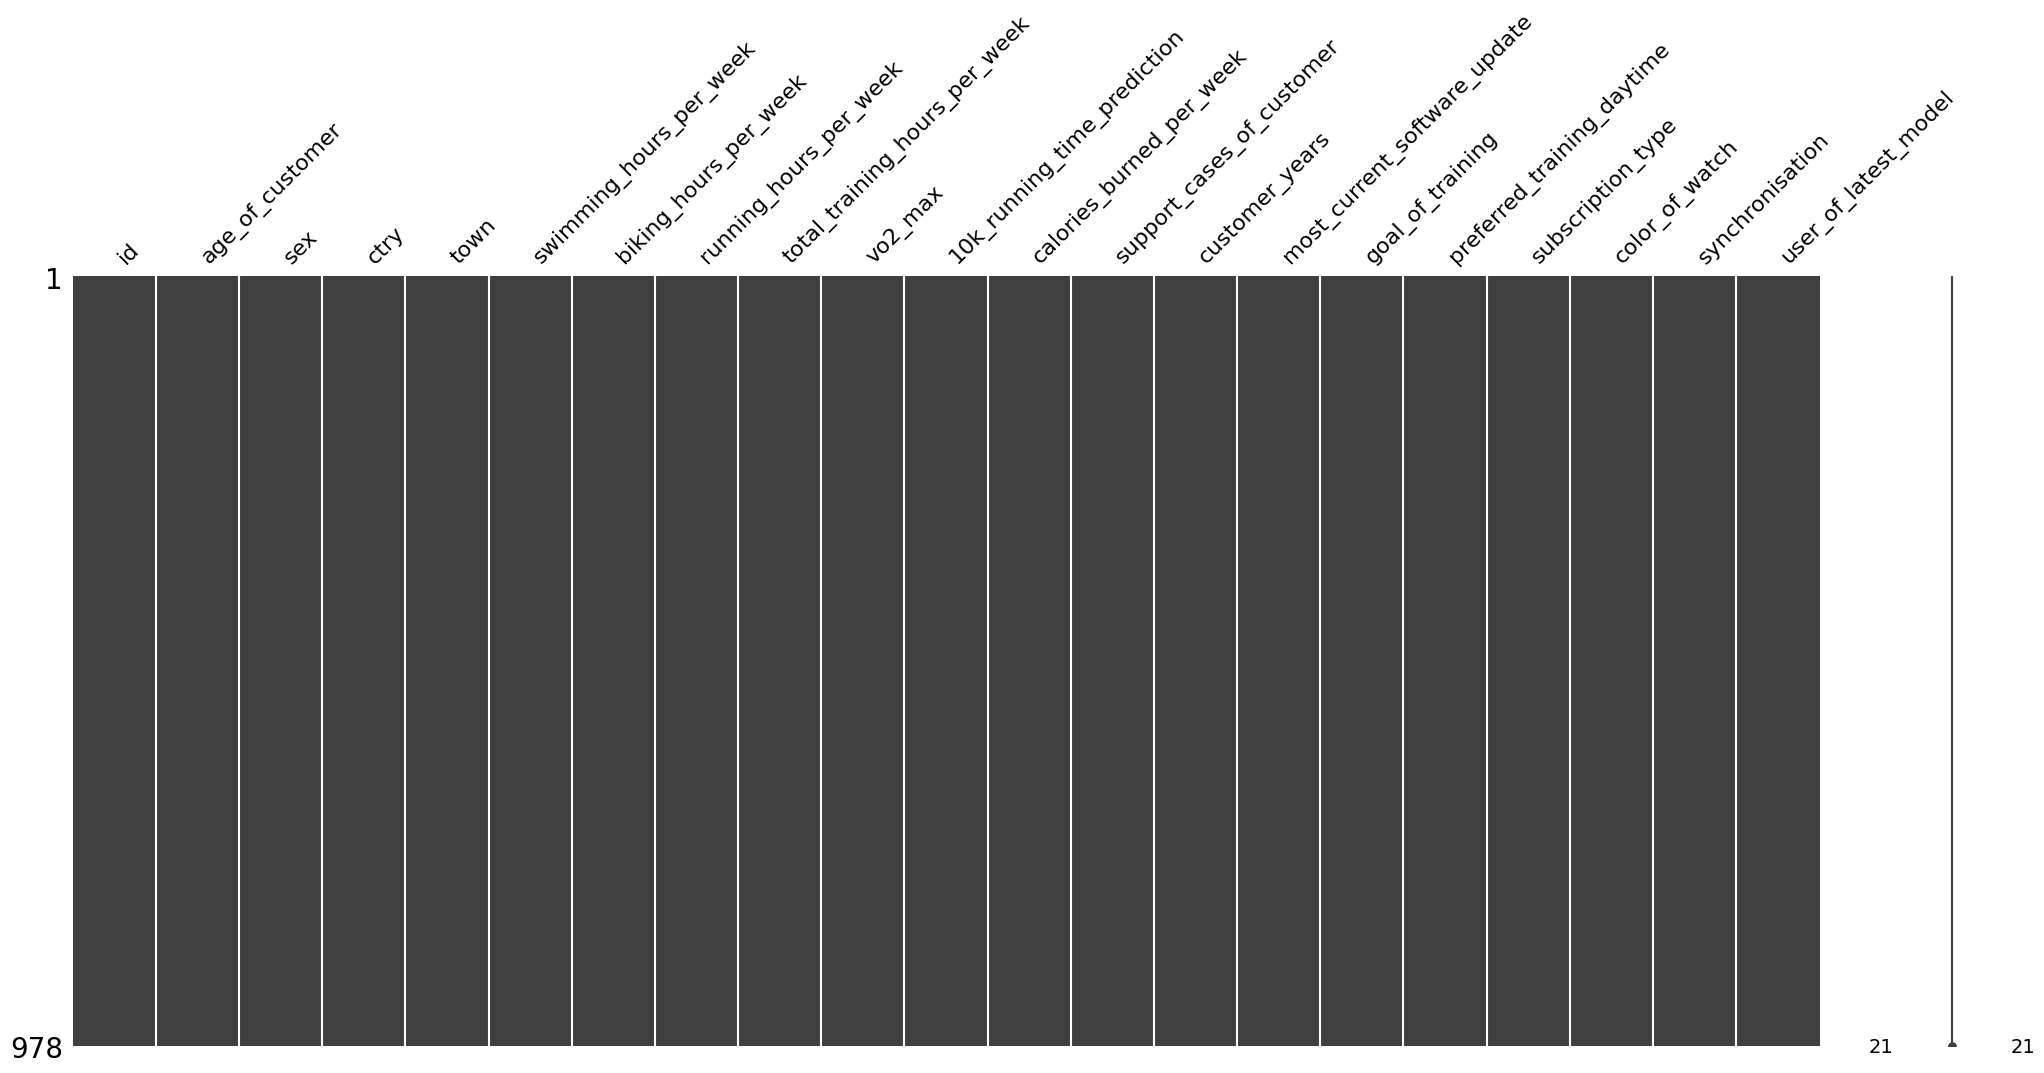

In [39]:
msno.matrix(df_step_2)

In [40]:
# Copy the dataframe before applying the one hot encoding
df_step_2_org = df_step_2.copy()

# Convert category columns to one hot encoding
df_hot_encoded_feat = pd.get_dummies(df_step_2.filter(category_columns), 
                                     columns=category_columns, 
                                     drop_first=True, 
                                     prefix="hot_enc_", dtype=int)
df_step_2 = pd.concat([df_step_2, df_hot_encoded_feat], axis=1)
df_step_2 = df_step_2.drop(category_columns + text_columns, axis=1)

In [41]:
df_step_2.shape

(978, 41)

In [42]:
assert df_step_2.isnull().sum().sum() == 0, "There are still missing values in the dataset"
data_loss = (df.shape[0] - df_step_2.shape[0])*100/(df.shape[0])
print("Data loss Step 2: ", data_loss, "%")
df_step_2.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john_prep_2.csv", index=False)

Data loss Step 2:  2.2 %


Step 2 results in a final dataframe of 978 rows and 41 columns. That is we lost 2.2% of the training data. 

## Step 3: Data Normalization

<Axes: >

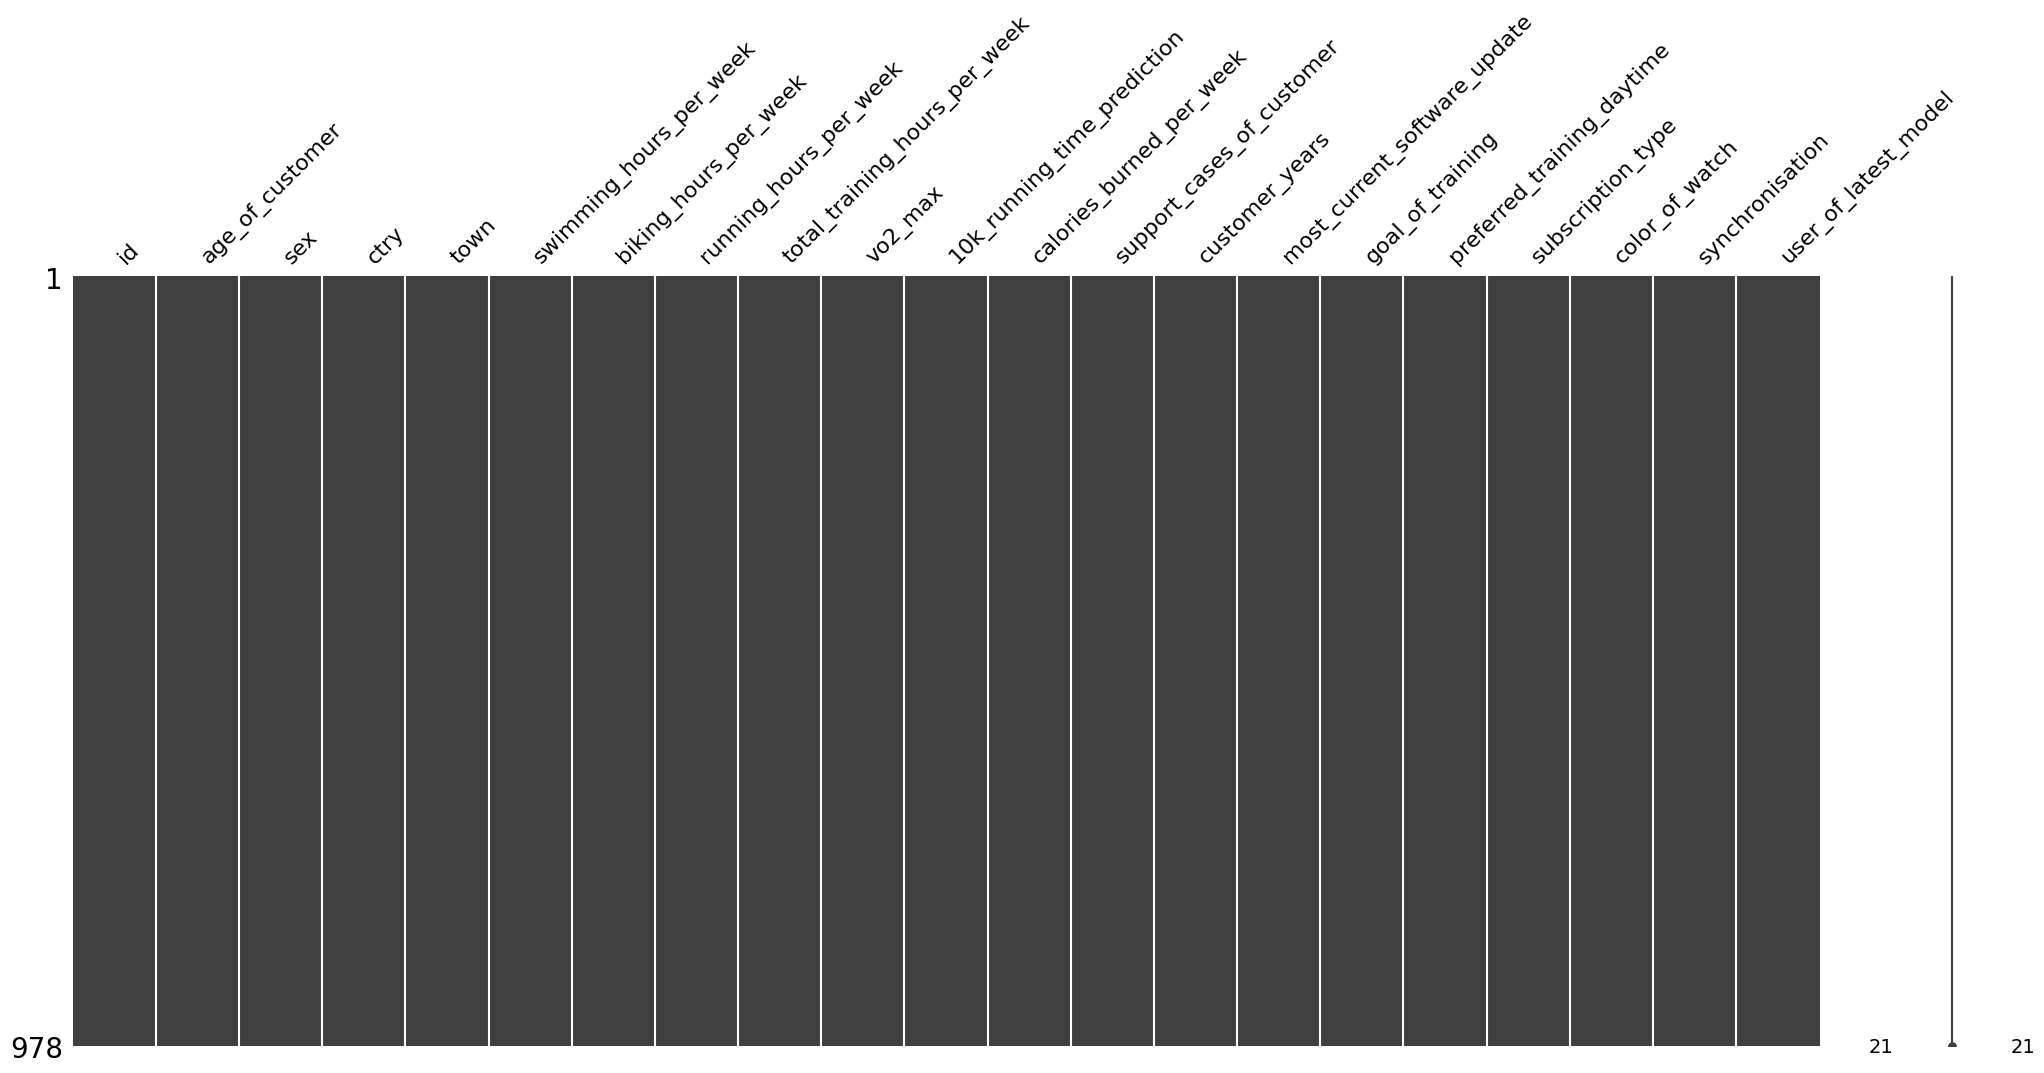

In [43]:
df_step_3 = df_step_2_org.copy()
msno.matrix(df_step_3)

### Normality Check & Quantile Transformation

In [44]:
# Normality check for numeric columns 
# Shapiro-Wilk Test
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer

def shapiro_wilk_test(data: pd.DataFrame , alpha: float) -> bool:
    """Shapiro-Wilk Test for normality

    Args:
        data (pd.DataFrame): input data
        alpha (float): alpha value for significance test

    Returns:
        bool: p-values for normality test
    """
    stat, p = shapiro(data)
    print('\tStatistics=%.3f, p=%.5f' % (stat, p))
    if p > alpha:
        print('\tSample looks Gaussian (fail to reject H0)')
        return True
    else:
        print('\tSample does not look Gaussian (reject H0)')
        return False

def normality_check_and_quantile_transformation(df: pd.DataFrame, 
                                                numeric_columns: list[str], 
                                                alpha: float) -> pd.DataFrame: 
    """Normality check for numeric columns and apply quantile transformation

    Args:
        df (pd.DataFrame): input dataframe
        numeric_columns (list[str]): numeric columns
        alpha (float): alpha value for significance test

    Returns:
        pd.DataFrame: transformed dataframe
    """
    numeric_columns_gaussian_check = {}
    for col in numeric_columns:
        print("Normality test for column: ", col)
        numeric_columns_gaussian_check[col] = shapiro_wilk_test(df[col],alpha)    
        
    org_name_transformed_cols = []
    # Quantile Transformation
    for col in numeric_columns:
        if numeric_columns_gaussian_check[col] == False:
            print("Transforming column: ", col)
            n_quantiles = int(np.sqrt(len(df[col])))
            qt = QuantileTransformer(n_quantiles=n_quantiles, 
                                    output_distribution='normal',
                                    random_state=0)
            
            trans_x=qt.fit_transform(np.array(df[col].array.reshape(-1, 1)))
            df[f'{col}_transformed']=trans_x
            org_name_transformed_cols.append(col)

    return df, org_name_transformed_cols

alpha = 0.05
df_step_3, org_name_transformed_cols = normality_check_and_quantile_transformation(df_step_3, numeric_columns, alpha)
df_step_3 = df_step_3.drop(org_name_transformed_cols, axis=1)

Normality test for column:  age_of_customer
	Statistics=0.964, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  swimming_hours_per_week
	Statistics=0.964, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  biking_hours_per_week
	Statistics=0.972, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  running_hours_per_week
	Statistics=0.969, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  total_training_hours_per_week
	Statistics=0.977, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  vo2_max
	Statistics=0.941, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  10k_running_time_prediction
	Statistics=0.961, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  calories_burned_per_week
	Statistics=0.981, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for colum

array([[<Axes: title={'center': 'age_of_customer_transformed'}>,
        <Axes: title={'center': 'swimming_hours_per_week_transformed'}>,
        <Axes: title={'center': 'biking_hours_per_week_transformed'}>],
       [<Axes: title={'center': 'running_hours_per_week_transformed'}>,
        <Axes: title={'center': 'total_training_hours_per_week_transformed'}>,
        <Axes: title={'center': 'vo2_max_transformed'}>],
       [<Axes: title={'center': '10k_running_time_prediction_transformed'}>,
        <Axes: title={'center': 'calories_burned_per_week_transformed'}>,
        <Axes: title={'center': 'support_cases_of_customer_transformed'}>],
       [<Axes: title={'center': 'customer_years_transformed'}>, <Axes: >,
        <Axes: >]], dtype=object)

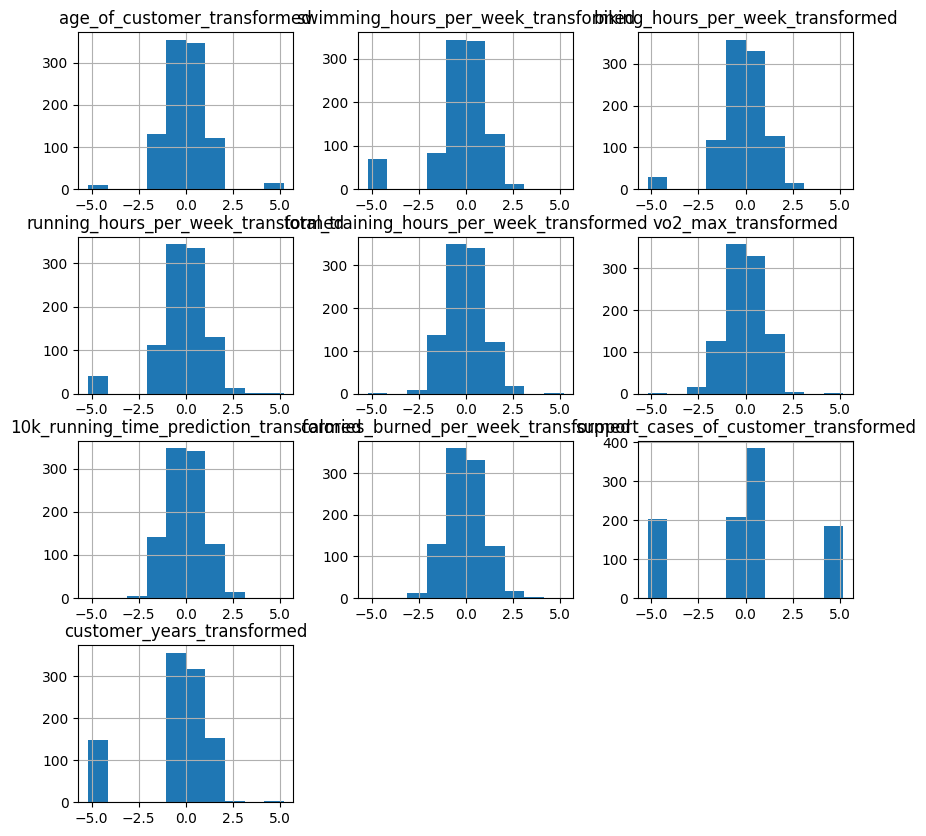

In [45]:
transformed_num_columns = [col for col in df_step_3.columns if 'transformed' in col]
df_step_3.filter(transformed_num_columns).hist(figsize=(10,10))

<Axes: >

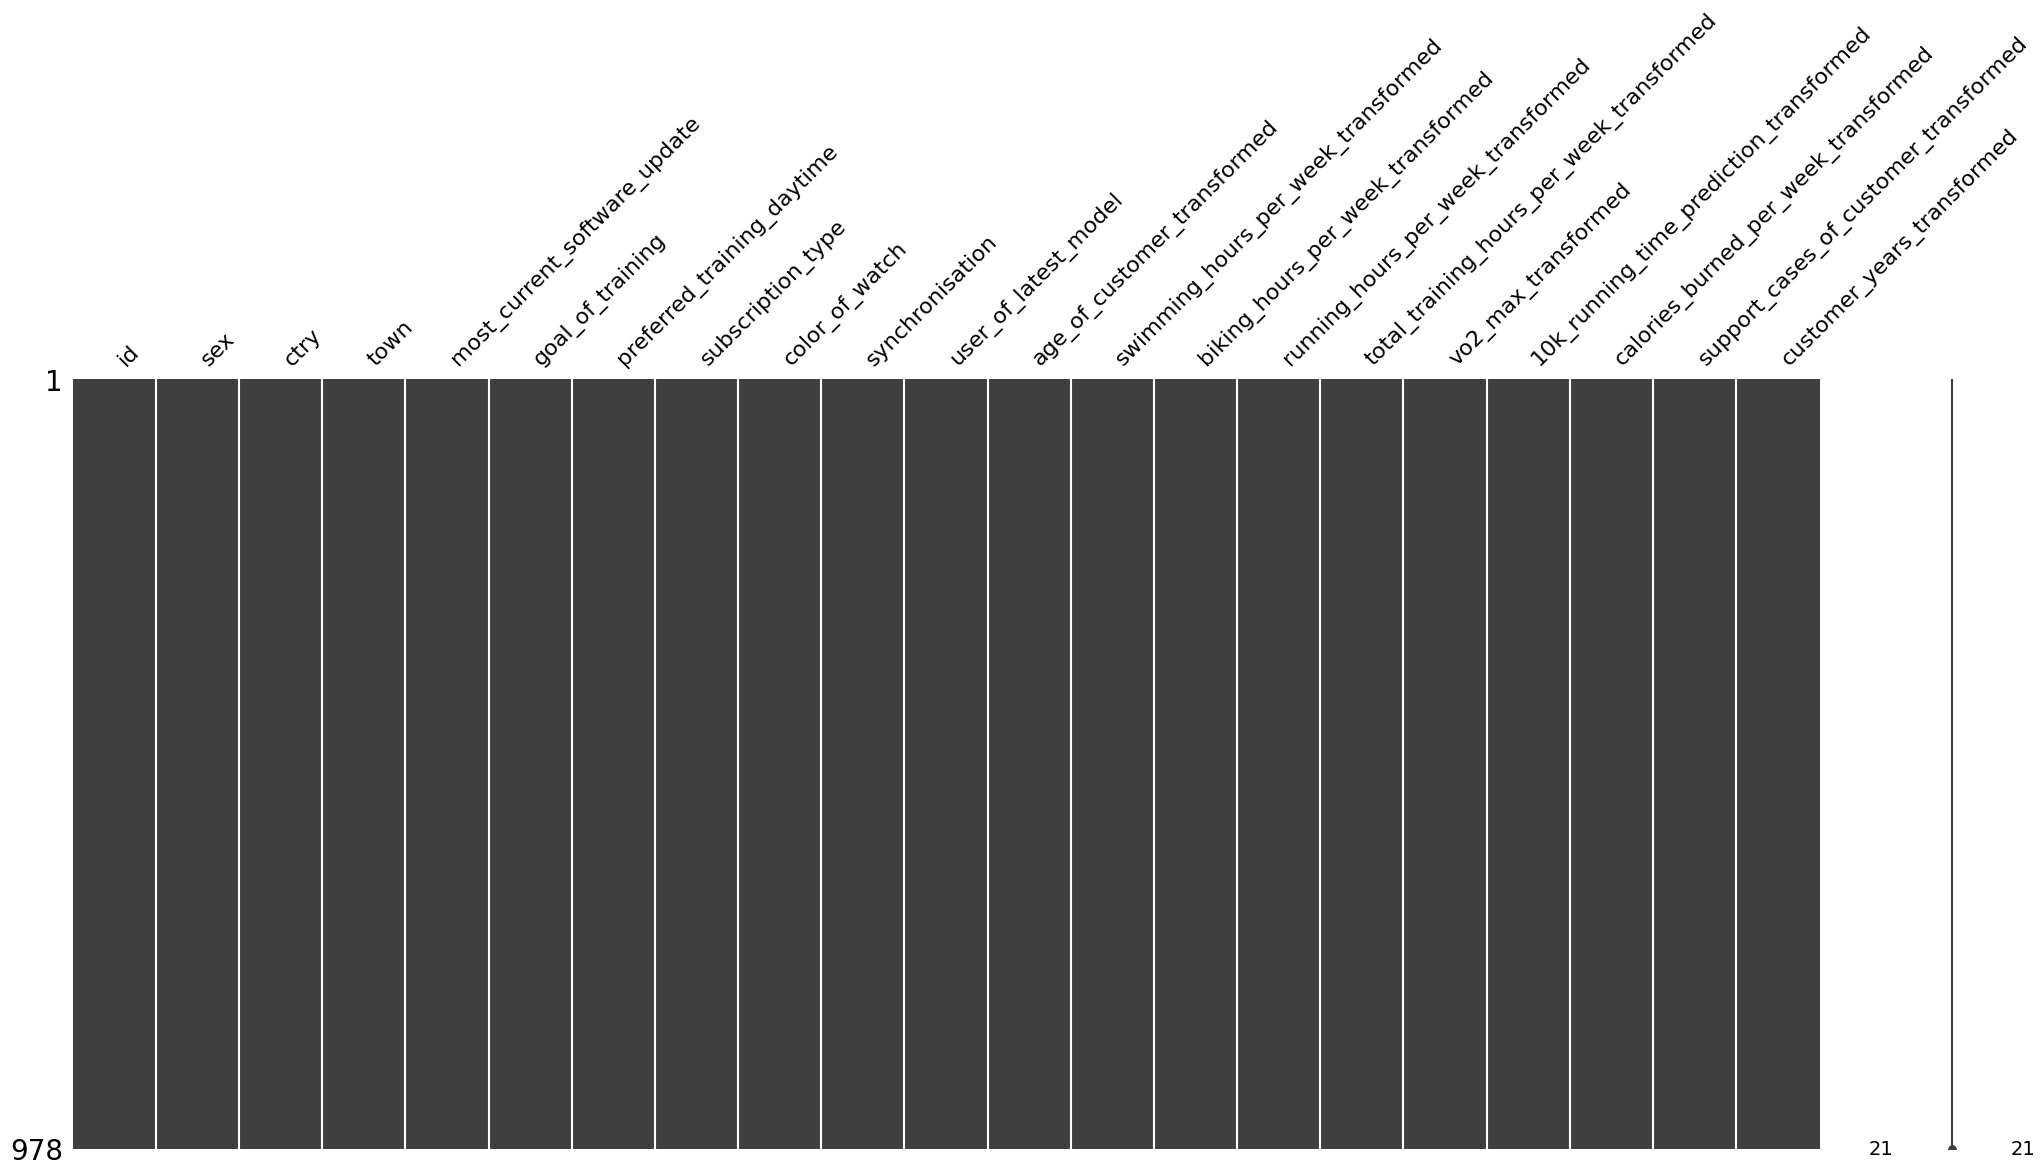

In [46]:
msno.matrix(df_step_3)

In [47]:
df_step_3_org = df_step_3.copy()    

# Convert category columns to one hot encoding
df_hot_encoded_feat = pd.get_dummies(df_step_3.filter(category_columns), 
                                     columns=category_columns, 
                                     drop_first=True, 
                                     prefix="hot_enc_", dtype=int)

df_step_3 = pd.concat([df_step_3, df_hot_encoded_feat], axis=1)
df_step_3 = df_step_3.drop(category_columns + text_columns, axis=1)

In [48]:
df_step_3.shape

(978, 41)

In [49]:
assert df_step_3.isnull().sum().sum() == 0, "There are still missing values in the dataset"
data_loss = (df.shape[0] - df_step_3.shape[0])*100/(df.shape[0])
print("Data loss Step 2: ", data_loss, "%")
df_step_3.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john_prep_3.csv", index=False)

Data loss Step 2:  2.2 %


Step 3 results in a final dataframe of 978 rows and 41 columns. That is we lost 2.2% of the training data. 

## Step 4: Feature Engineering

In [50]:
df_step_4 = df_step_3.copy()

### Feature Transformation

In [51]:
# Get day, month and year from the date column
df_step_4['most_current_software_update'] = pd.to_datetime(df_step_4['most_current_software_update'])
df_step_4['most_current_software_update_month'] = df_step_4['most_current_software_update'].dt.month
df_step_4['most_current_software_update_day'] = df_step_4['most_current_software_update'].dt.day
df_step_4['most_current_software_update_year'] = df_step_4['most_current_software_update'].dt.year

transformed_num_columns = transformed_num_columns + ['most_current_software_update_month', 
                                     'most_current_software_update_day', 
                                     'most_current_software_update_year']

df_step_4 = df_step_4.drop(date_columns, axis=1)

df_step_4_org = df_step_4.copy()

<Axes: >

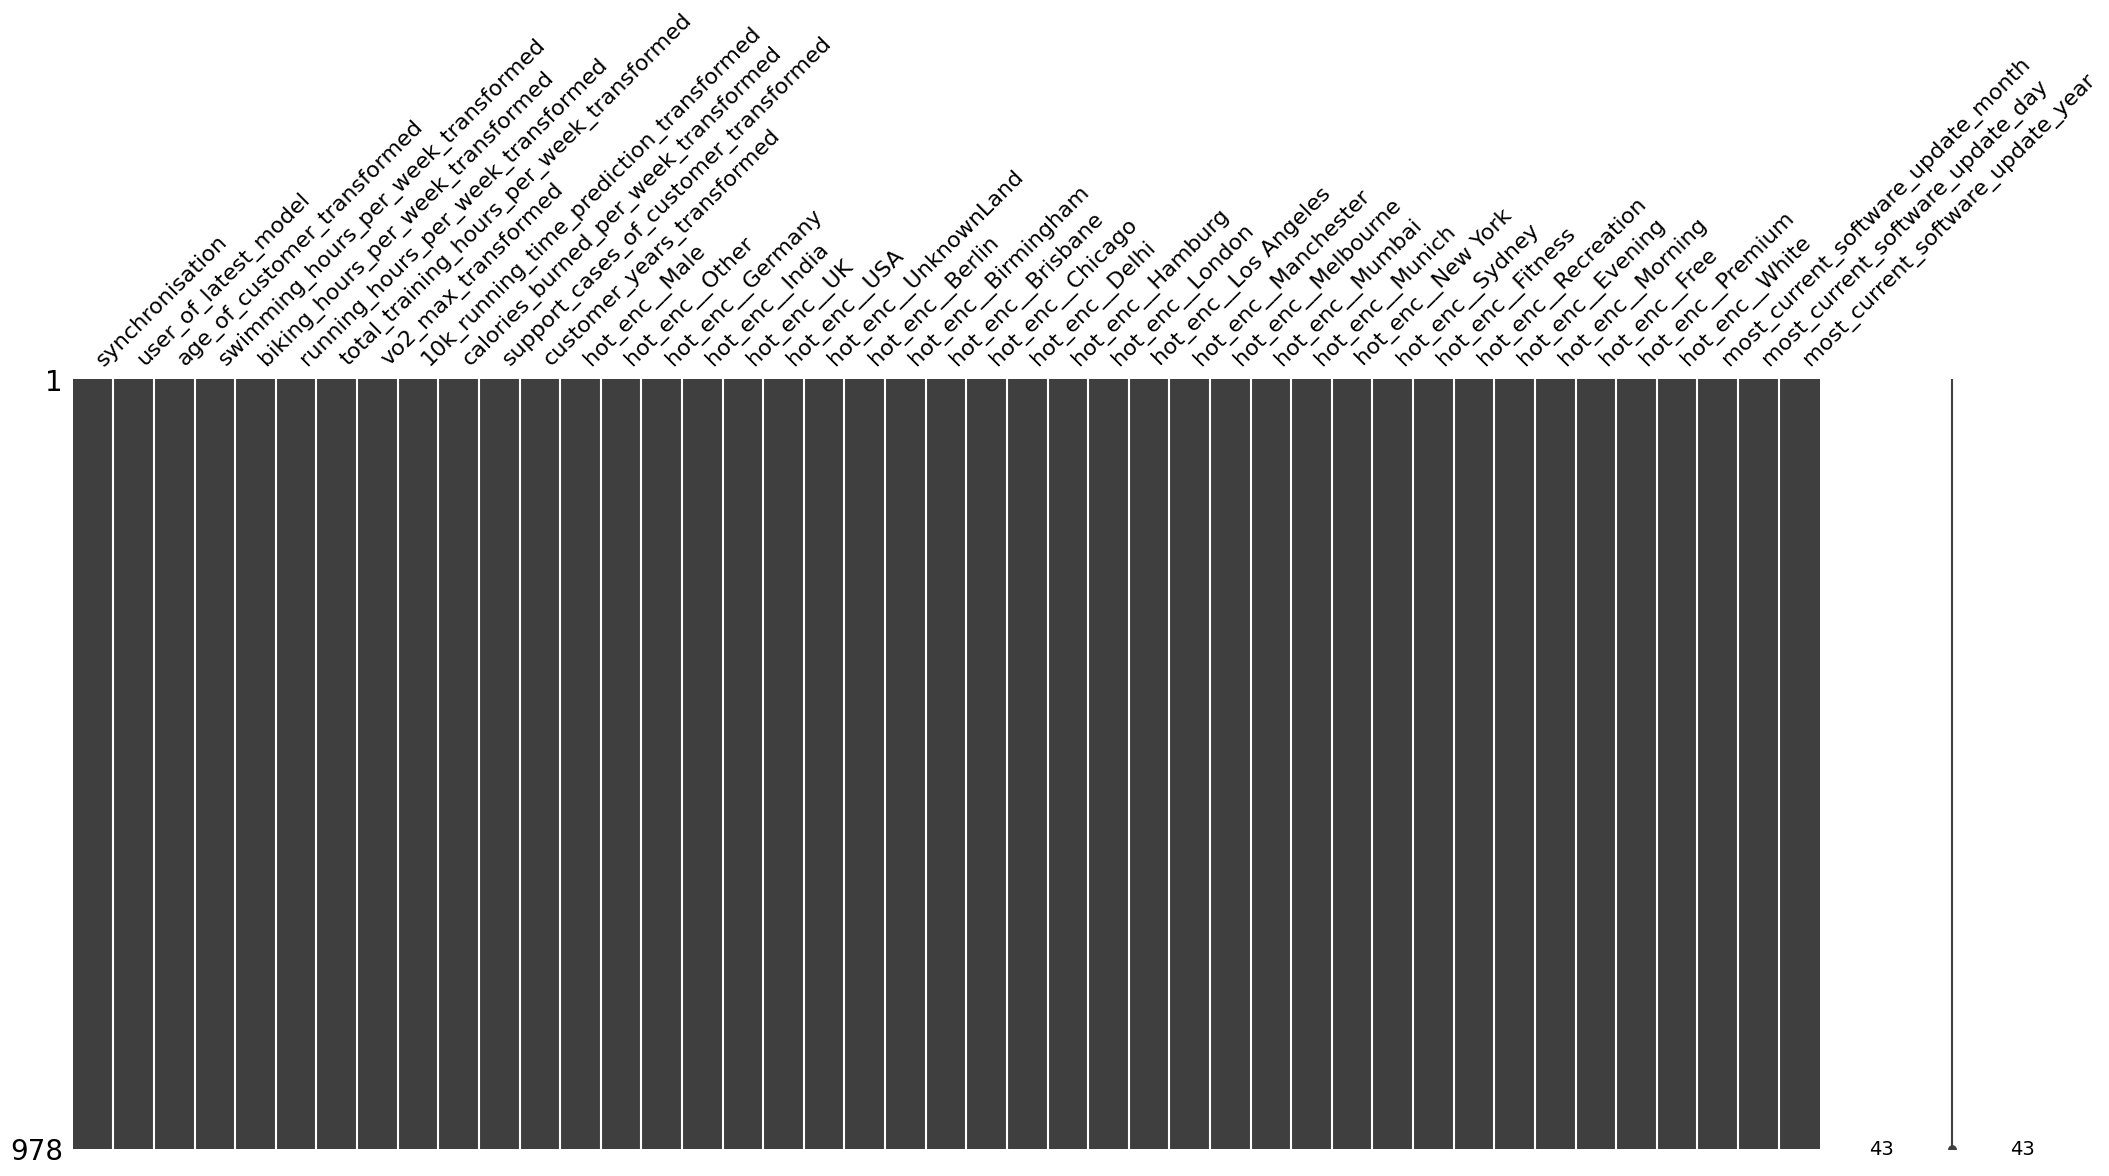

In [52]:
msno.matrix(df_step_4)

### Multicoliniarity check

**Variance Inflation Factor (VIF)**

VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. If a feature has a high VIF, it means that it can be predicted by a linear combination of other independent variables, making it redundant.

- VIF = 1 → No multicollinearity. The predictor is independent.
- 1 < VIF < 5 → Low multicollinearity, not a concern.
- 5 < VIF < 10 → Moderate multicollinearity, might need investigation.
- VIF > 10 → High multicollinearity, meaning the feature is almost entirely explained by other features and should be considered for removal

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Apply Multicoliniarity check
def calculate_vif(df: pd.DataFrame, features: list[str]) -> pd.DataFrame:
    """Calculate Variance Inflation Factor (VIF) for each feature

    Args:
        df (pd.DataFrame): input dataframe
        features (list[str]): list of features to calculate VIF for

    Returns:
        pd.DataFrame: dataframe with VIF values
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

features = df_step_4.columns
vif_data = calculate_vif(df_step_4, features)
print(vif_data.sort_values('VIF', ascending=False))

                                      feature         VIF
42          most_current_software_update_year  286.664047
17                               hot_enc__USA   51.992119
15                             hot_enc__India   49.175596
16                                hot_enc__UK   36.707480
14                           hot_enc__Germany   25.661193
31                          hot_enc__New York   23.004357
28                         hot_enc__Melbourne   20.626279
22                           hot_enc__Chicago   20.600717
19                            hot_enc__Berlin   18.663894
21                          hot_enc__Brisbane   18.483066
26                       hot_enc__Los Angeles   18.114336
20                        hot_enc__Birmingham   18.012789
32                            hot_enc__Sydney   17.820381
6   total_training_hours_per_week_transformed   17.053320
27                        hot_enc__Manchester   15.109330
25                            hot_enc__London   13.571630
9        calor

<Axes: >

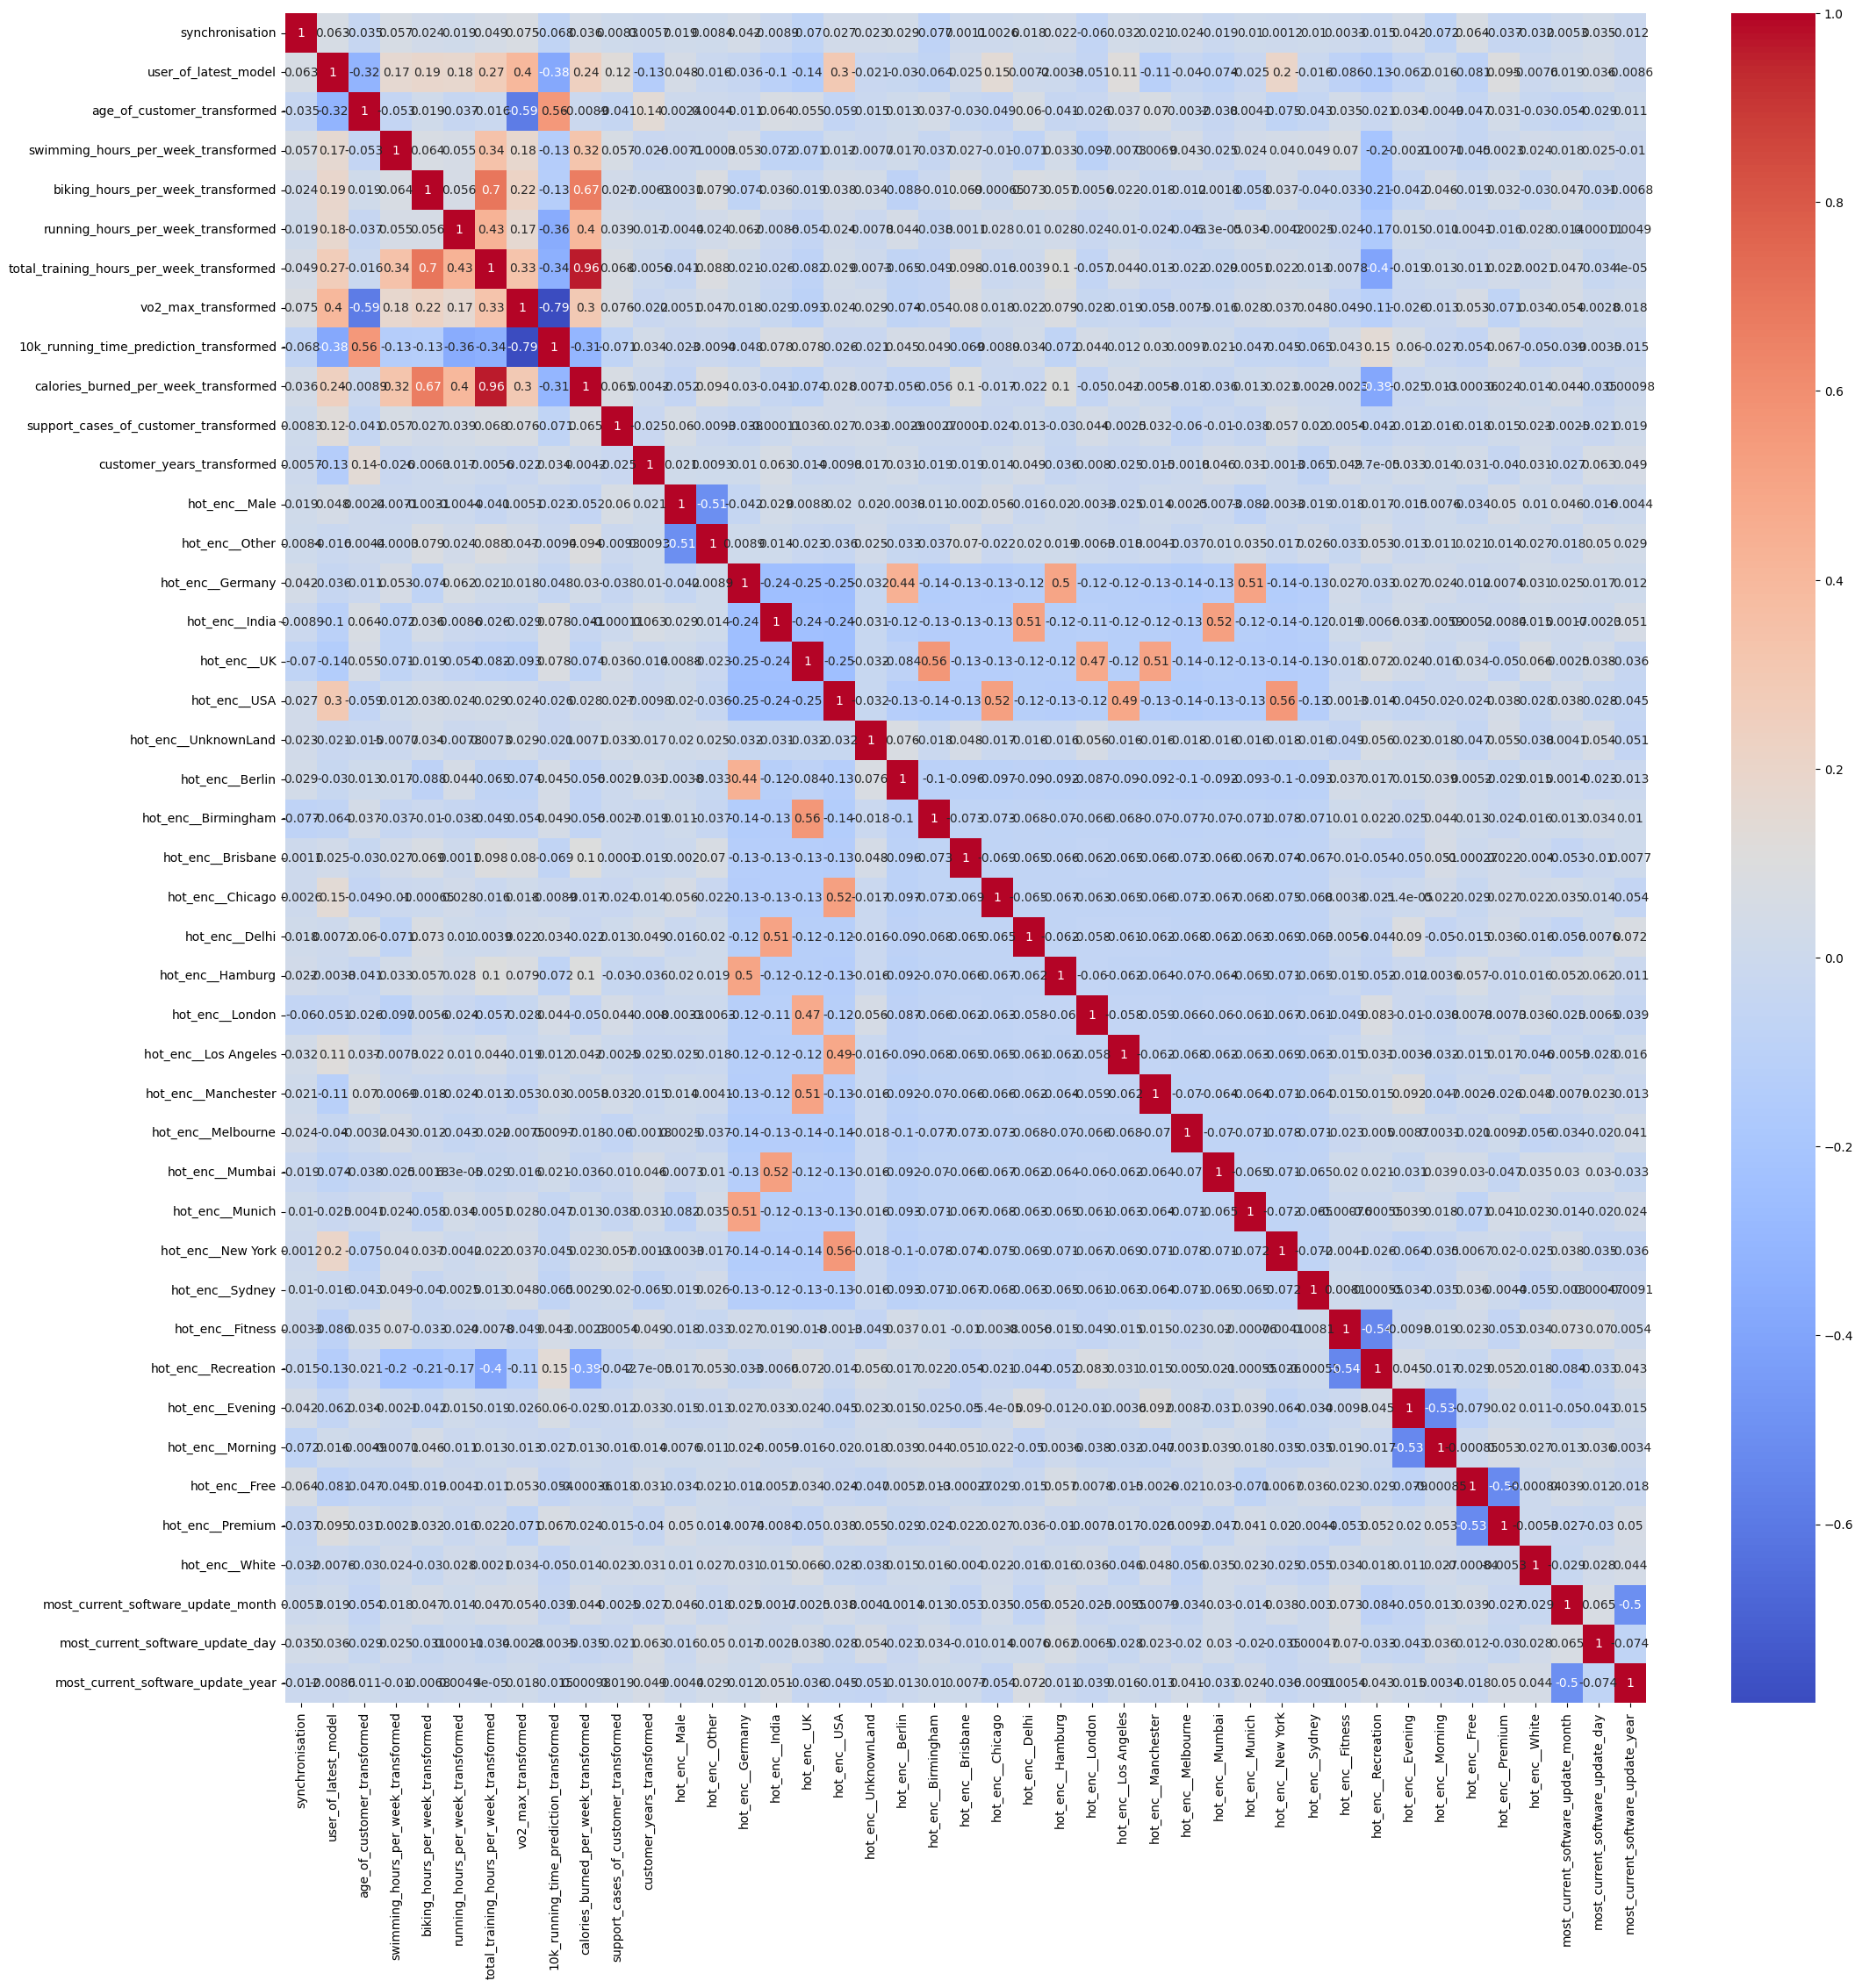

In [54]:
correlation = df_step_4.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [55]:
features_to_remove = vif_data[vif_data['VIF'] > 10].feature
df_step_4 = df_step_4.drop(features_to_remove, axis=1)

<Axes: >

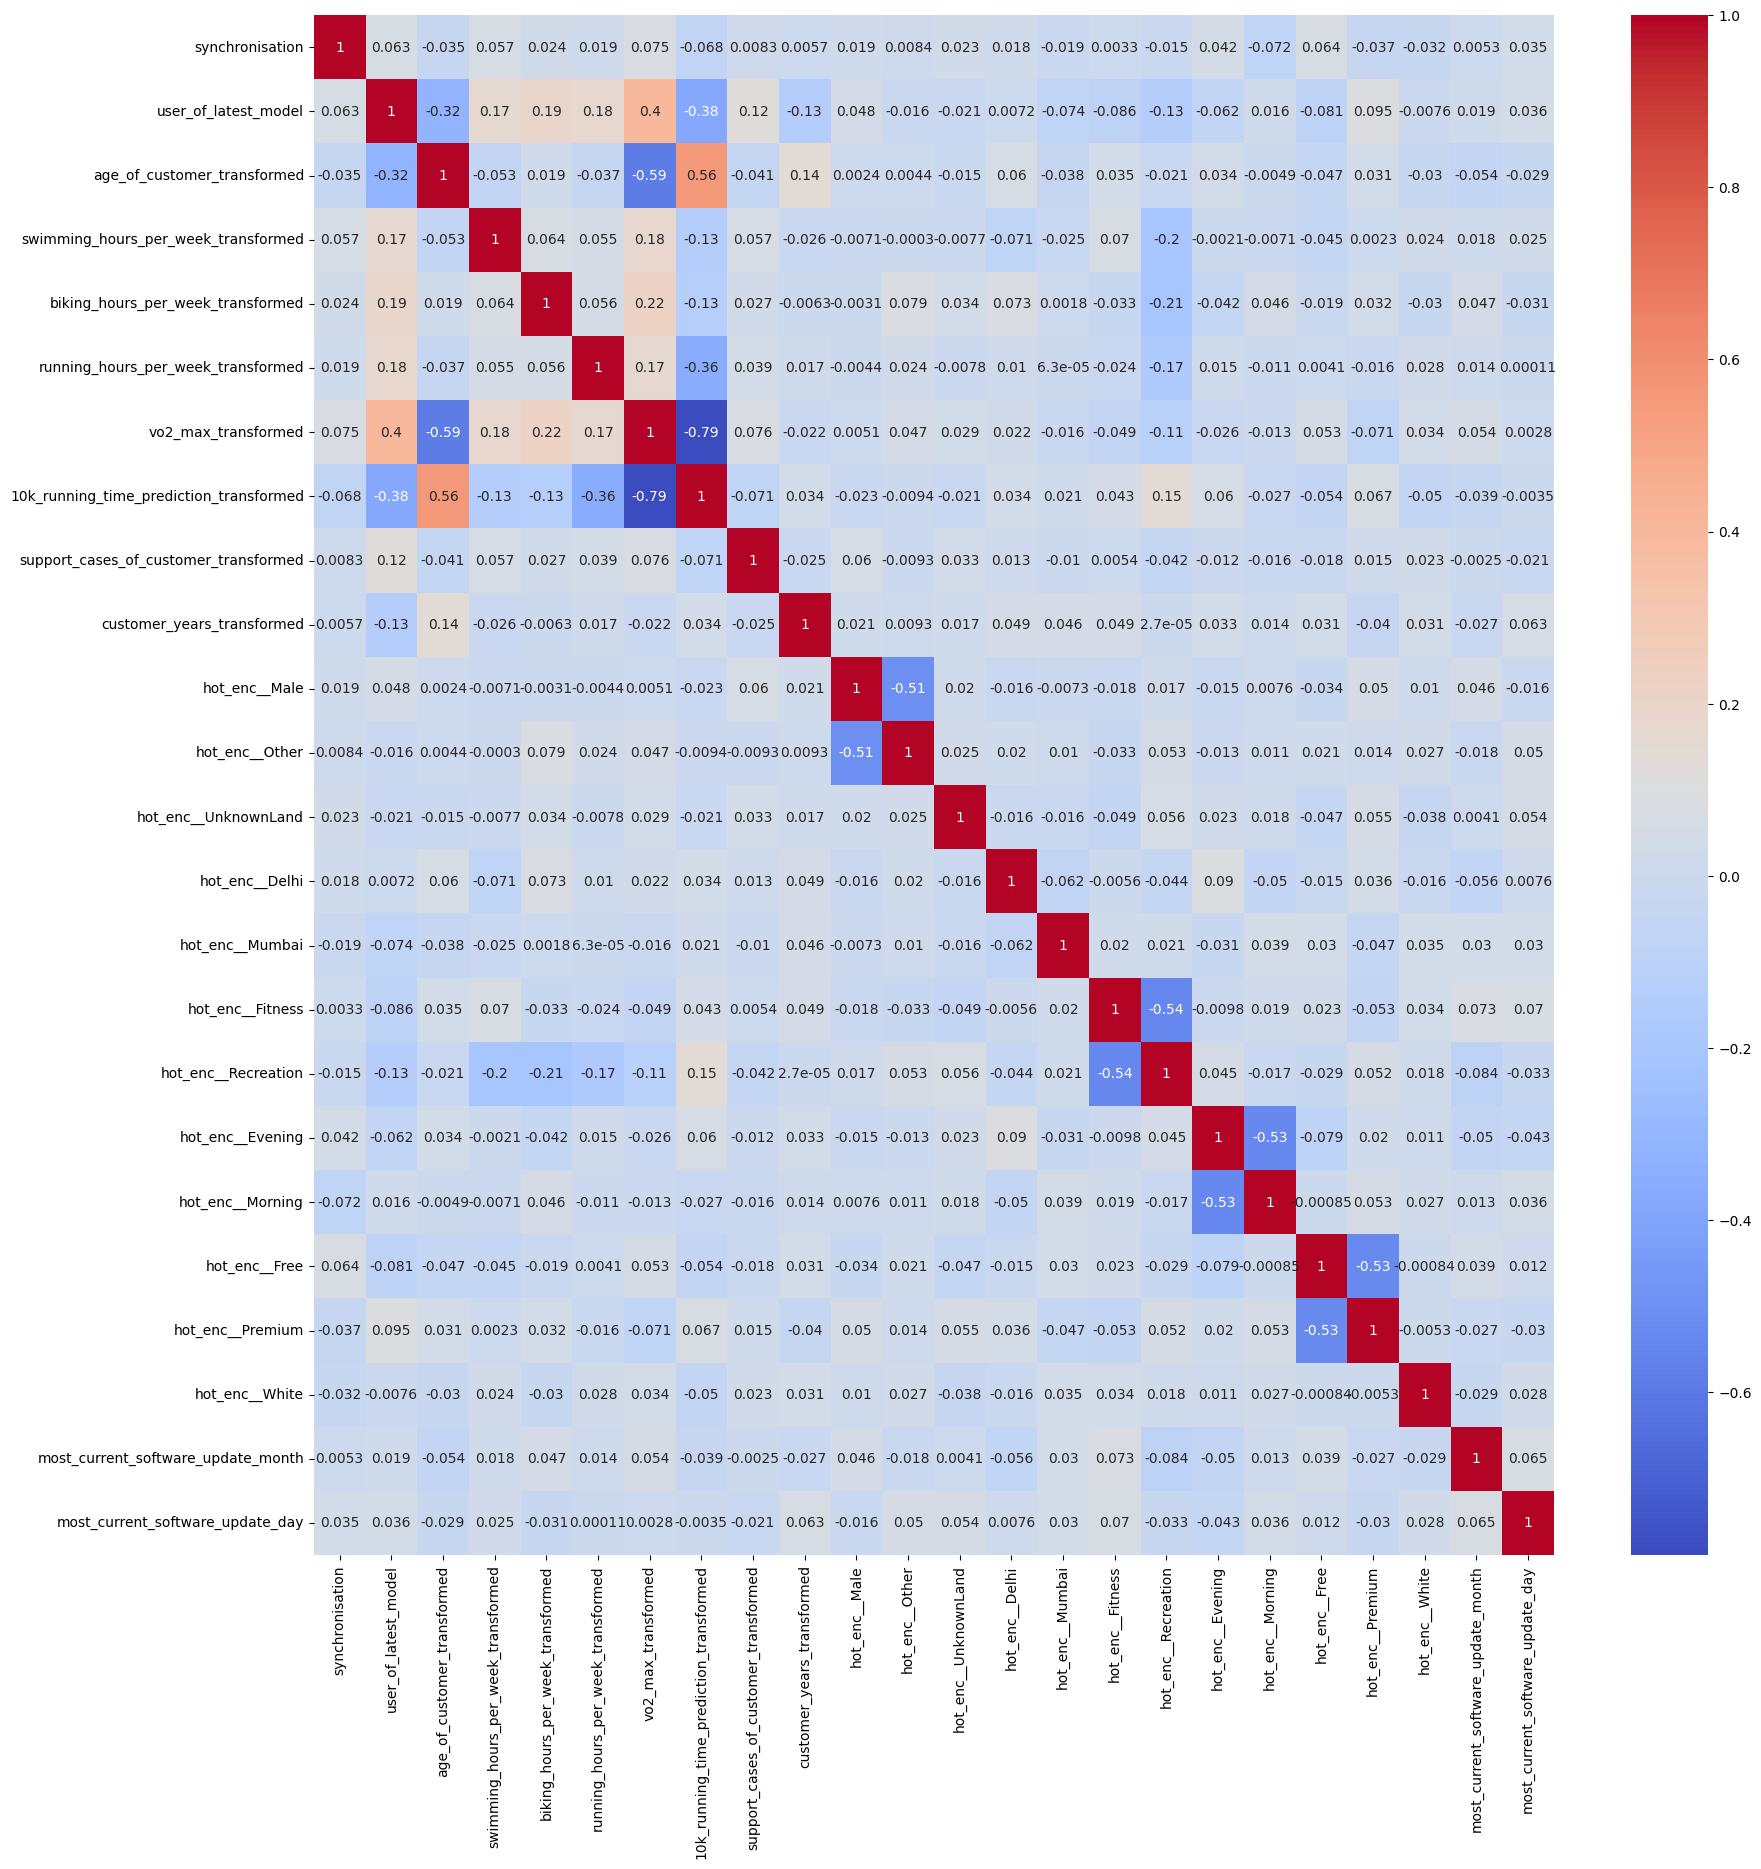

In [56]:
correlation = df_step_4.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [57]:
assert df_step_4.isnull().sum().sum() == 0, "There are still missing values in the dataset"
data_loss = (df.shape[0] - df_step_4.shape[0])*100/(df.shape[0])
print("Data loss Step 2: ", data_loss, "%")
df_step_4.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john_prep_4.csv", index=False)

Data loss Step 2:  2.2 %


Step 4 results in a final dataframe of 978 rows and 24 columns. That is we lost 2.2% of the training data. 

## Step 5: Dimensionality Reduction (PCA)

**Apply PCA (keep 95% variance)**

In [63]:
df_step_5 = df_step_4_org.copy()

In [64]:
features = [col for col in df_step_5.columns if target_columns[0] not in col]
print("Features: ", np.array(features))

Features:  ['synchronisation' 'age_of_customer_transformed'
 'swimming_hours_per_week_transformed' 'biking_hours_per_week_transformed'
 'running_hours_per_week_transformed'
 'total_training_hours_per_week_transformed' 'vo2_max_transformed'
 '10k_running_time_prediction_transformed'
 'calories_burned_per_week_transformed'
 'support_cases_of_customer_transformed' 'customer_years_transformed'
 'hot_enc__Male' 'hot_enc__Other' 'hot_enc__Germany' 'hot_enc__India'
 'hot_enc__UK' 'hot_enc__USA' 'hot_enc__UnknownLand' 'hot_enc__Berlin'
 'hot_enc__Birmingham' 'hot_enc__Brisbane' 'hot_enc__Chicago'
 'hot_enc__Delhi' 'hot_enc__Hamburg' 'hot_enc__London'
 'hot_enc__Los Angeles' 'hot_enc__Manchester' 'hot_enc__Melbourne'
 'hot_enc__Mumbai' 'hot_enc__Munich' 'hot_enc__New York' 'hot_enc__Sydney'
 'hot_enc__Fitness' 'hot_enc__Recreation' 'hot_enc__Evening'
 'hot_enc__Morning' 'hot_enc__Free' 'hot_enc__Premium' 'hot_enc__White'
 'most_current_software_update_month' 'most_current_software_update_day'
 

In [65]:
from sklearn.decomposition import PCA

X = df_step_5.filter(features).copy()
Y = df_step_5[target_columns[0]].values
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
df_step_5 = pd.concat([pd.DataFrame(X_pca), pd.DataFrame(Y, columns=target_columns) ], axis=1).reset_index(drop=True)

In [66]:
import pickle
with open('../../models/pca_transform_on_train_data.pkl', 'wb') as file:
    pickle.dump(pca, file)

<Axes: >

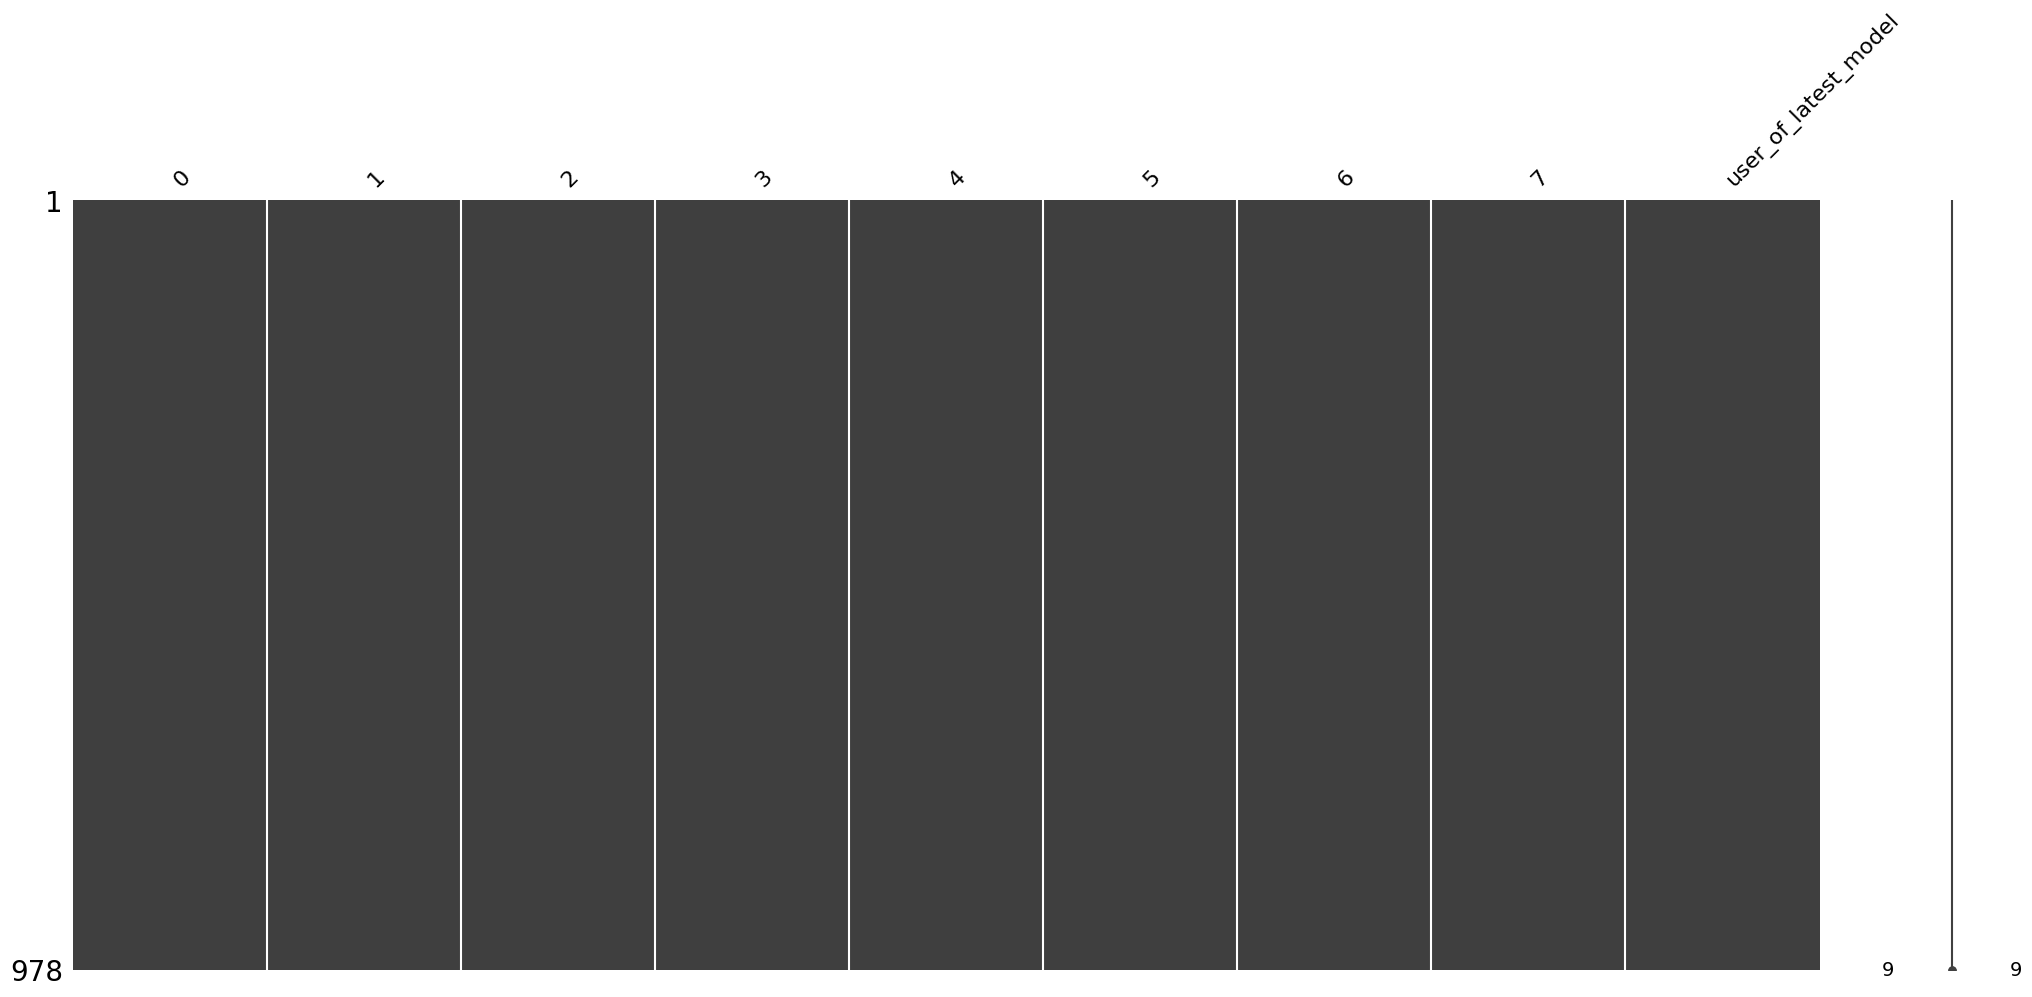

In [67]:
msno.matrix(df_step_5)

In [68]:
assert df_step_5.isnull().sum().sum() == 0, "There are still missing values in the dataset"
data_loss = (df.shape[0] - df_step_5.shape[0])*100/(df.shape[0])
print("Data loss Step 2: ", data_loss, "%")
df_step_5.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john_prep_5.csv", index=False)

Data loss Step 2:  2.2 %


Step 5 results in a final dataframe of 978 rows and 7 columns. That is we lost 2.2% of the training data. 

## Step 6: Feature Selection

In [48]:
df_step_6 = df_step_2_org.copy()

<Axes: >

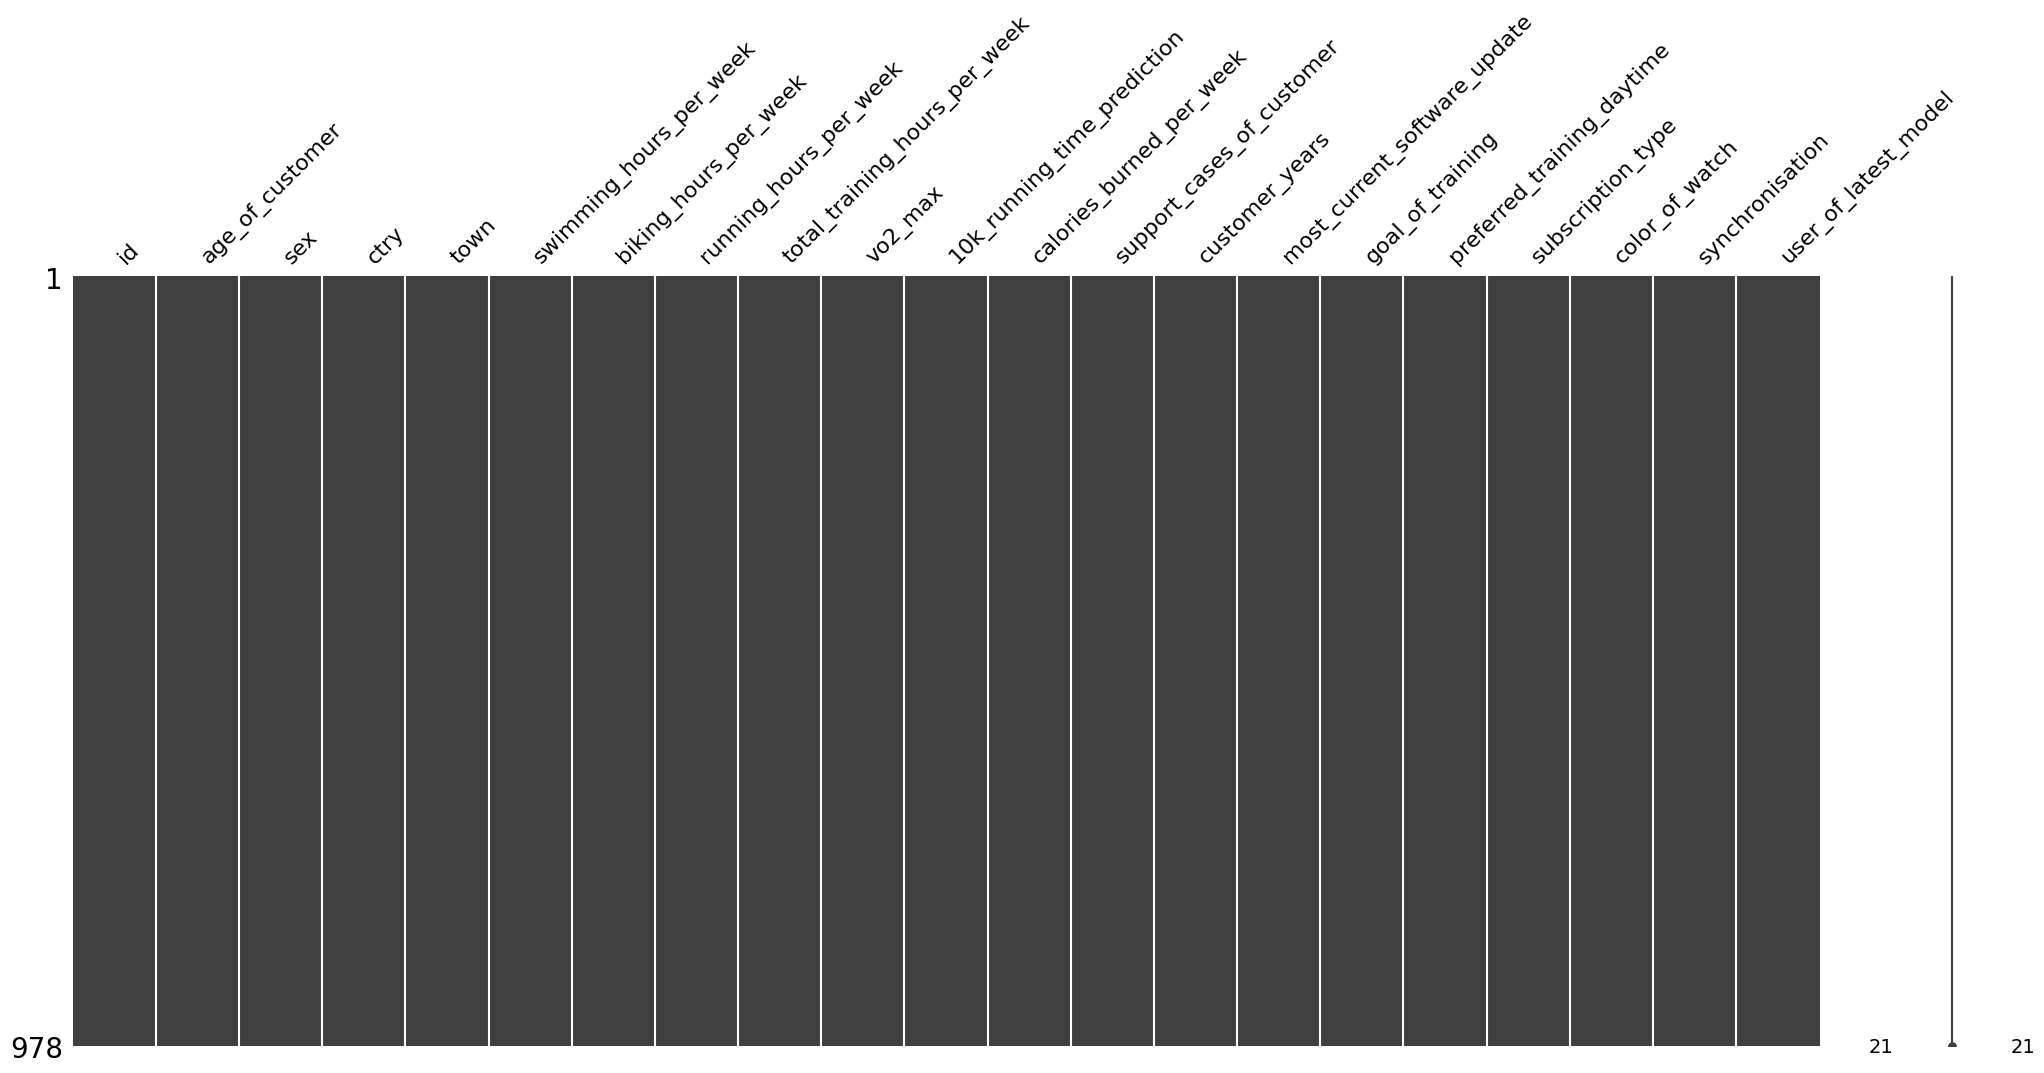

In [49]:
msno.matrix(df_step_6)

In [50]:
# Feaure Engineering
df_step_6['average_calories_burned_week'] = df_step_6['calories_burned_per_week']/df_step_6['total_training_hours_per_week']

In [53]:
numeric_columns, target_columns

(['age_of_customer',
  'swimming_hours_per_week',
  'biking_hours_per_week',
  'running_hours_per_week',
  'total_training_hours_per_week',
  'vo2_max',
  '10k_running_time_prediction',
  'calories_burned_per_week',
  'support_cases_of_customer',
  'customer_years'],
 ['user_of_latest_model'])

<Axes: >

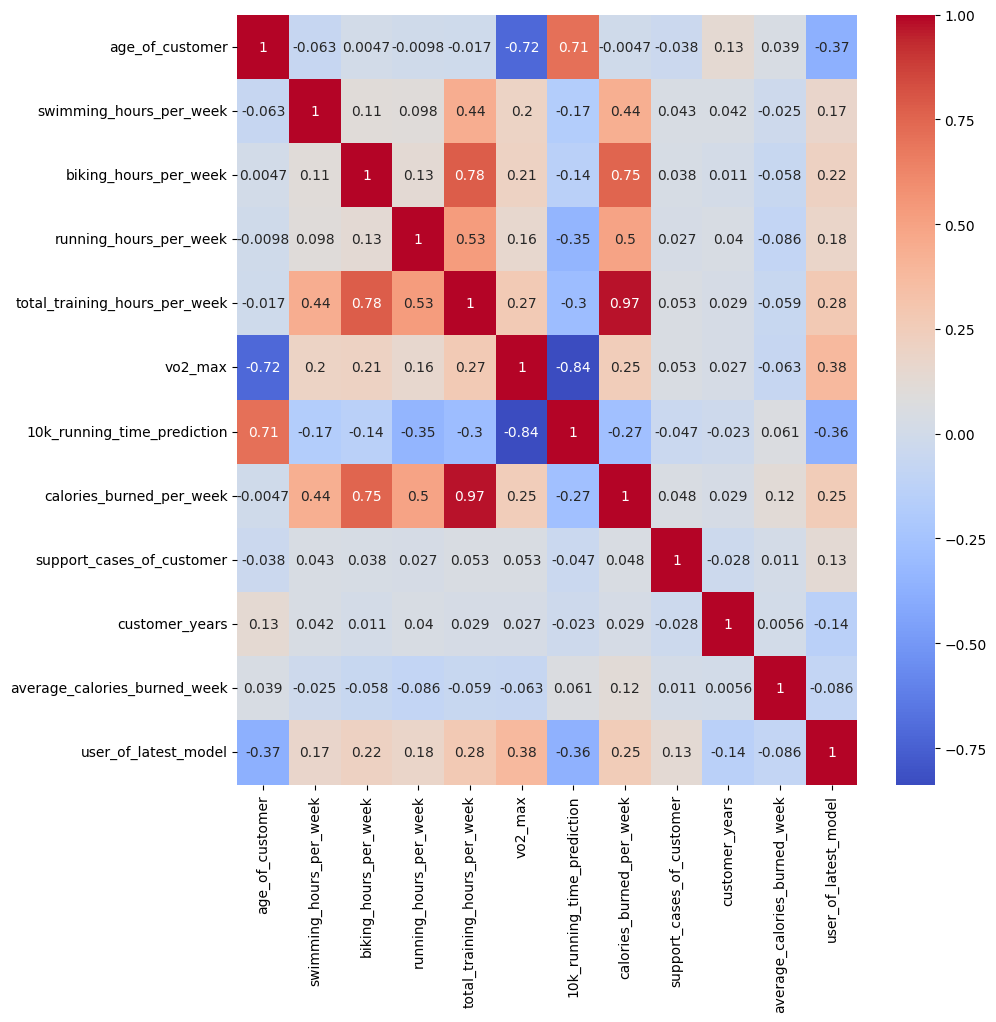

In [55]:
correlation = df_step_6[numeric_columns + ['average_calories_burned_week'] + target_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Feature Selection

In [204]:
df = df_step_4_org.copy()

In [205]:
model_feateures = transformed_num_columns + list(df_hot_encoded_feat.columns)
print(np.array(model_feateures))

['age_of_customer_transformed' 'swimming_hours_per_week_transformed'
 'biking_hours_per_week_transformed' 'running_hours_per_week_transformed'
 'total_training_hours_per_week_transformed' 'vo2_max_transformed'
 '10k_running_time_prediction_transformed'
 'calories_burned_per_week_transformed'
 'support_cases_of_customer_transformed' 'customer_years_transformed'
 'most_current_software_update_month' 'most_current_software_update_day'
 'most_current_software_update_year' 'hot_enc__Male' 'hot_enc__Other'
 'hot_enc__Germany' 'hot_enc__India' 'hot_enc__UK' 'hot_enc__USA'
 'hot_enc__UnknownLand' 'hot_enc__Berlin' 'hot_enc__Birmingham'
 'hot_enc__Brisbane' 'hot_enc__Chicago' 'hot_enc__Delhi'
 'hot_enc__Hamburg' 'hot_enc__London' 'hot_enc__Los Angeles'
 'hot_enc__Manchester' 'hot_enc__Melbourne' 'hot_enc__Mumbai'
 'hot_enc__Munich' 'hot_enc__New York' 'hot_enc__Sydney'
 'hot_enc__Fitness' 'hot_enc__Recreation' 'hot_enc__Evening'
 'hot_enc__Morning' 'hot_enc__Free' 'hot_enc__Premium' 'hot_enc__W

### Feature selection for continuous data using pearson correlation

In [206]:
df_numeric = df[transformed_num_columns + target_columns].copy()
df_numeric.head()

age_of_customer_transformed  swimming_hours_per_week_transformed  \
0                     1.501086                             0.308594   
1                     1.036433                            -0.314683   
2                    -0.622926                            -0.531261   
3                    -1.382994                             0.164228   
4                     1.833915                            -0.819502   

   biking_hours_per_week_transformed  running_hours_per_week_transformed  \
0                          -1.858546                           -0.607285   
1                           1.187245                            0.696099   
2                           1.820536                            2.444257   
3                          -0.149592                           -1.110772   
4                           0.233988                           -1.284931   

   total_training_hours_per_week_transformed  vo2_max_transformed  \
0                                  -1.525829            -1.721213   
1                                   1.049296            -0.838924   
2                                   1.983450             1.975487   
3                                  -0.550898            -0.363988   
4                                  -0.690194             0.000000   

   10k_running_time_prediction_transformed  \
0                                 1.846849   
1                                 1.069322   
2                                -1.878970   
3                                 0.185287   
4                                 2.080482   

   calories_burned_per_week_transformed  \
0                             -1.423842   
1                              1.006384   
2                              1.976397   
3                              0.000000   
4                             -0.735468   

   support_cases_of_customer_transformed  customer_years_transformed  \
0                               0.041789                   -0.783500   
1                               0.041789                   -0.783500   
2                               0.041789                   -5.199338   
3                               0.572968                   -5.199338   
4                               0.572968                   -0.083652   

   most_current_software_update_month  most_current_software_update_day  \
0                                   7                                22   
1                                   5                                11   
2                                   8                                16   
3                                   8                                11   
4                                  11                                18   

   most_current_software_update_year  user_of_latest_model  
0                               2024                   1.0  
1                               2024                   0.0  
2                               2024                   1.0  
3                               2024                   1.0  
4                               2024                   0.0

<Axes: >

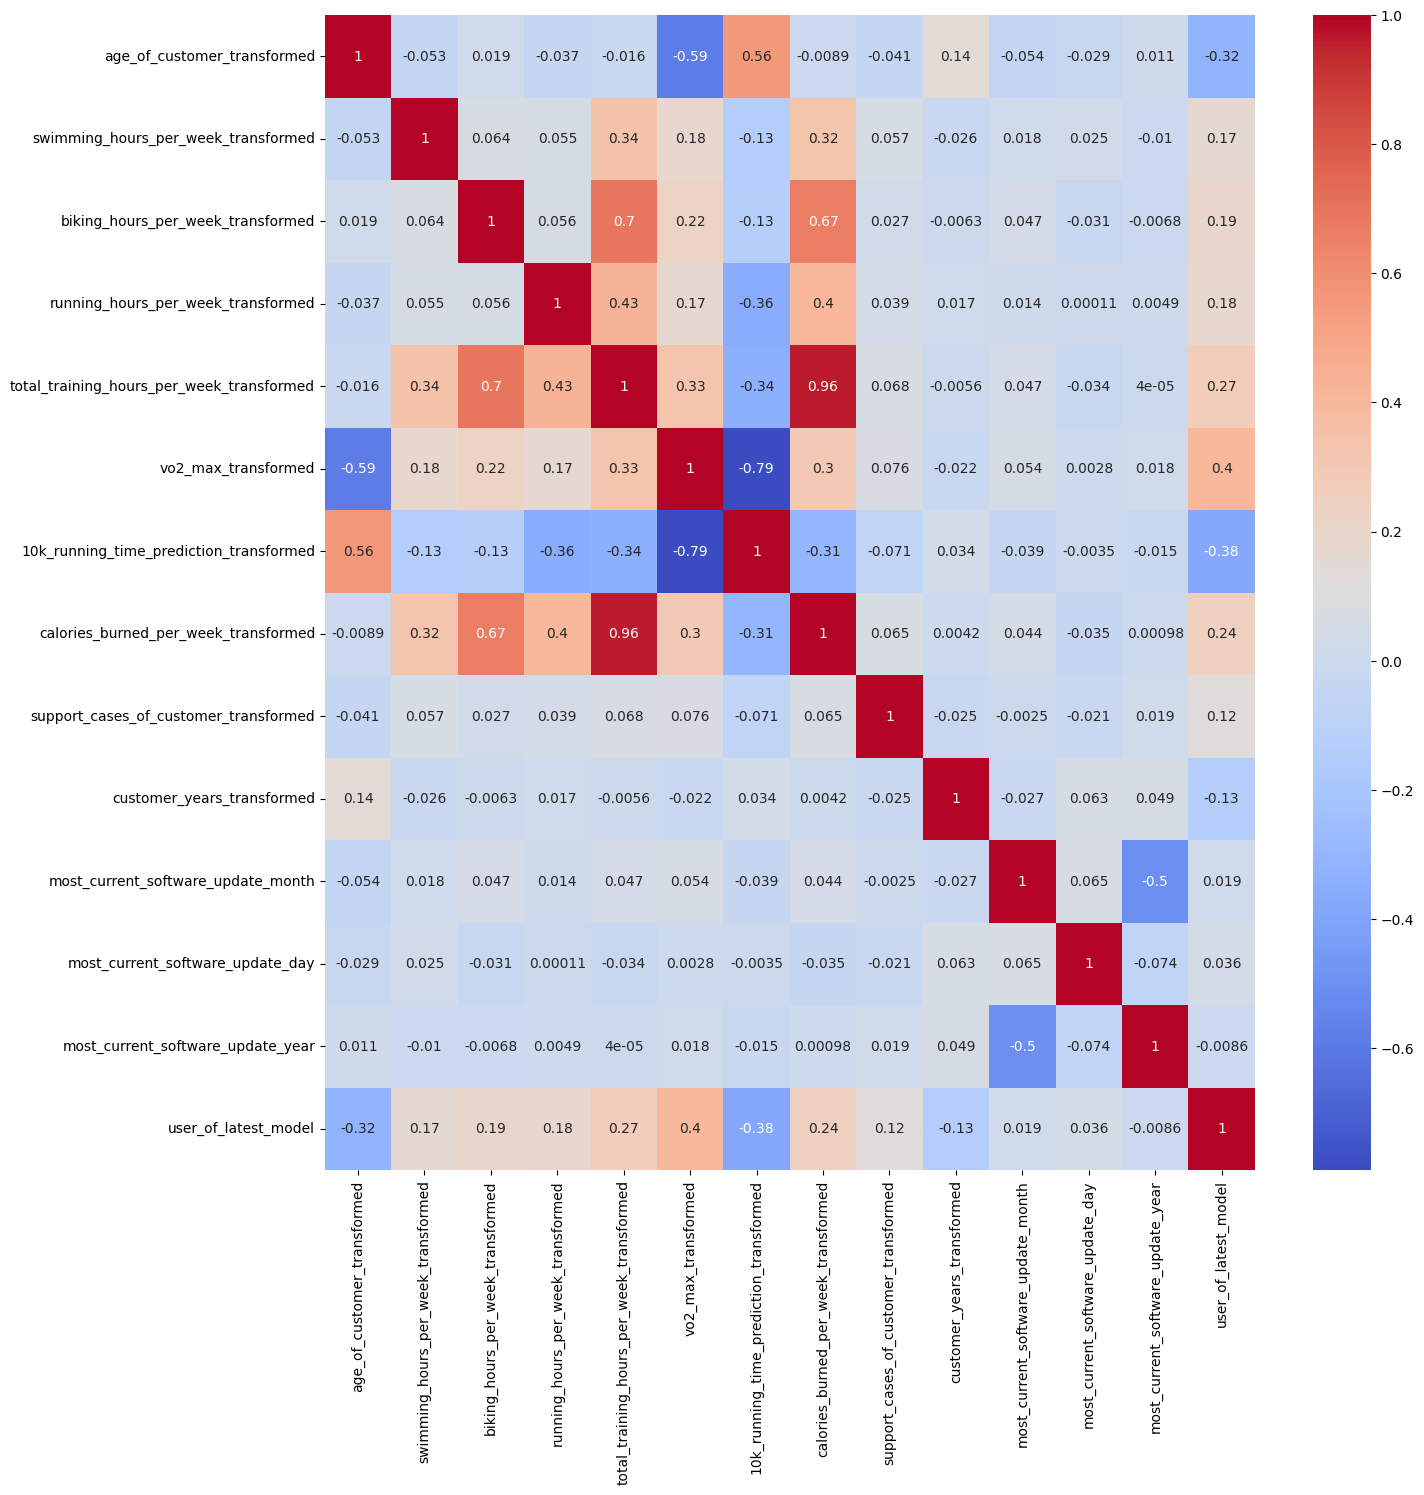

In [228]:
correlation = df_numeric.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [227]:
transformed_num_columns

['age_of_customer_transformed',
 'swimming_hours_per_week_transformed',
 'biking_hours_per_week_transformed',
 'running_hours_per_week_transformed',
 'total_training_hours_per_week_transformed',
 'vo2_max_transformed',
 '10k_running_time_prediction_transformed',
 'calories_burned_per_week_transformed',
 'support_cases_of_customer_transformed',
 'customer_years_transformed',
 'most_current_software_update_month',
 'most_current_software_update_day',
 'most_current_software_update_year',
 'most_current_software_update_month',
 'most_current_software_update_day',
 'most_current_software_update_year',
 'most_current_software_update_month',
 'most_current_software_update_day',
 'most_current_software_update_year']

Analyzing the numeric features, we can identify that the target column `user_of_latest_model` shows a relative correlation with the variables:

- **Negative**:
  - 10k_running_time_prediction_transformed
  - age_of_customer_transformed

- **Positive**:
  - vo2_max_transformed
  - total_training_hours_per_week_transformed
  - calories_burned_per_week_transformed


### Feature selection for numeric features and categorical taregt using Anova-f statistic

ANOVA (Analysis of Variance) is used to compare the means of a numerical variable across multiple groups. While our target is binary (two groups), we can still use ANOVA by re-framing the situation.

How It Works with a Binary Target:

- The two values of our binary target (e.g., 0 and 1) naturally define two distinct groups, Yes: Adopters of latest Watch Model. No: No Adopters of Latest Watch Model.
- **Compare the Means of the Numerical Columns**: For each group defined by the target, we calculate the mean of the numerical column.

**ANOVA's Goal**: ANOVA then assesses whether the difference between these two means is statistically significant. In other words, does knowing which group an observation belongs to (target value) tell us anything about its value in the numerical column?

What ANOVA is Actually Doing:

**Variance Decomposition**: ANOVA breaks down the total variability in the numerical column into two components:

- Between-Group Variance: This measures how much the means of the two target groups differ from each other. Larger differences mean higher between-group variance.
- Within-Group Variance: This measures how much the numerical values vary within each group. If the groups are very different, this variance will be low.
- F-Statistic: ANOVA calculates an F-statistic which is the ratio of between-group variance to within-group variance. A large F-statistic suggests that the between-group variance is large relative to the within-group variance, indicating that the group means are probably not equal.
- P-value: This F-statistic is then used to calculate a p-value. The p-value tells you the probability of observing such a large F-statistic by chance if there was actually no difference between the means of the two groups.
    - Small p-value (typically < 0.05): This indicates strong evidence against the null hypothesis that the means are equal. We reject the null and conclude there's a statistically significant relationship between the numerical column and the binary target.
    - Large p-value (typically > 0.05): This indicates weak evidence against the null hypothesis. We fail to reject the null and conclude that there's likely no significant relationship between the numerical column and the binary target (or, that we haven't found statistical evidence of one).


Important Note:

- Assumptions: ANOVA has assumptions (e.g., normally distributed data, equal variances within groups). Violating these assumptions can make results less reliable. Therefore we will use the transformed numerical columns to perform the anova test. 
- Correlation vs. Causation: ANOVA only shows association, not necessarily causation. A statistically significant result doesn't guarantee that the numerical column causes the different values in the binary target

In [229]:
#create a new dataframe with p-values of anova test for each numeric feature with label
from scipy.stats import f_oneway
anova_p_values = pd.DataFrame(index=transformed_num_columns, columns=['p-value'])
for pred_num_col in transformed_num_columns:
    data_anova = df[[pred_num_col] + target_columns].copy()
    groups = []
    for target_category in data_anova[target_columns[0]].unique():
        groups.append(data_anova[data_anova[target_columns[0]]==target_category][pred_num_col])
    stat, p = f_oneway(*groups)
    anova_p_values.loc[pred_num_col,'p-value'] = p
    
anova_p_values

p-value
age_of_customer_transformed                     0.0
swimming_hours_per_week_transformed             0.0
biking_hours_per_week_transformed               0.0
running_hours_per_week_transformed              0.0
total_training_hours_per_week_transformed       0.0
vo2_max_transformed                             0.0
10k_running_time_prediction_transformed         0.0
calories_burned_per_week_transformed            0.0
support_cases_of_customer_transformed      0.000143
customer_years_transformed                 0.000026
most_current_software_update_month         0.543753
most_current_software_update_day           0.259792
most_current_software_update_year          0.787121
most_current_software_update_month         0.543753
most_current_software_update_day           0.259792
most_current_software_update_year          0.787121
most_current_software_update_month         0.543753
most_current_software_update_day           0.259792
most_current_software_update_year          0.787121

In [230]:
feat_selected_num_columns = anova_p_values.index 
feat_selected_num_columns

Index(['age_of_customer_transformed', 'swimming_hours_per_week_transformed',
       'biking_hours_per_week_transformed',
       'running_hours_per_week_transformed',
       'total_training_hours_per_week_transformed', 'vo2_max_transformed',
       '10k_running_time_prediction_transformed',
       'calories_burned_per_week_transformed',
       'support_cases_of_customer_transformed', 'customer_years_transformed',
       'most_current_software_update_month',
       'most_current_software_update_day', 'most_current_software_update_year',
       'most_current_software_update_month',
       'most_current_software_update_day', 'most_current_software_update_year',
       'most_current_software_update_month',
       'most_current_software_update_day',
       'most_current_software_update_year'],
      dtype='object')

For all numerical transformed features the p-value are less than 0.05, which means that the features are significant for the model. This shows us a more clear relationship of the distributions of the numerical values and the fact whether someone will have the lastet watch model or not. This result was not clear when using the correlation matrix. 

### Feature selection for categorical features and categorial target using chi2 test

The Chi-Square (χ²) test is a statistical method often used for feature selection in non-continuous (categorical) data. It measures the dependence between a categorical feature and a target class (also categorical) to determine whether the feature is significantly associated with the target.

A large χ² value indicates that the feature and the target are likely dependent

In [231]:
# perform chi-squared test for nominal features
from scipy.stats import chi2_contingency

non_cont_columns = list(df_hot_encoded_feat.columns) + bool_columns + target_columns  

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=non_cont_columns, columns=non_cont_columns)
for i in non_cont_columns:
    for j in non_cont_columns:
        df_chi2 = df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p

<Axes: >

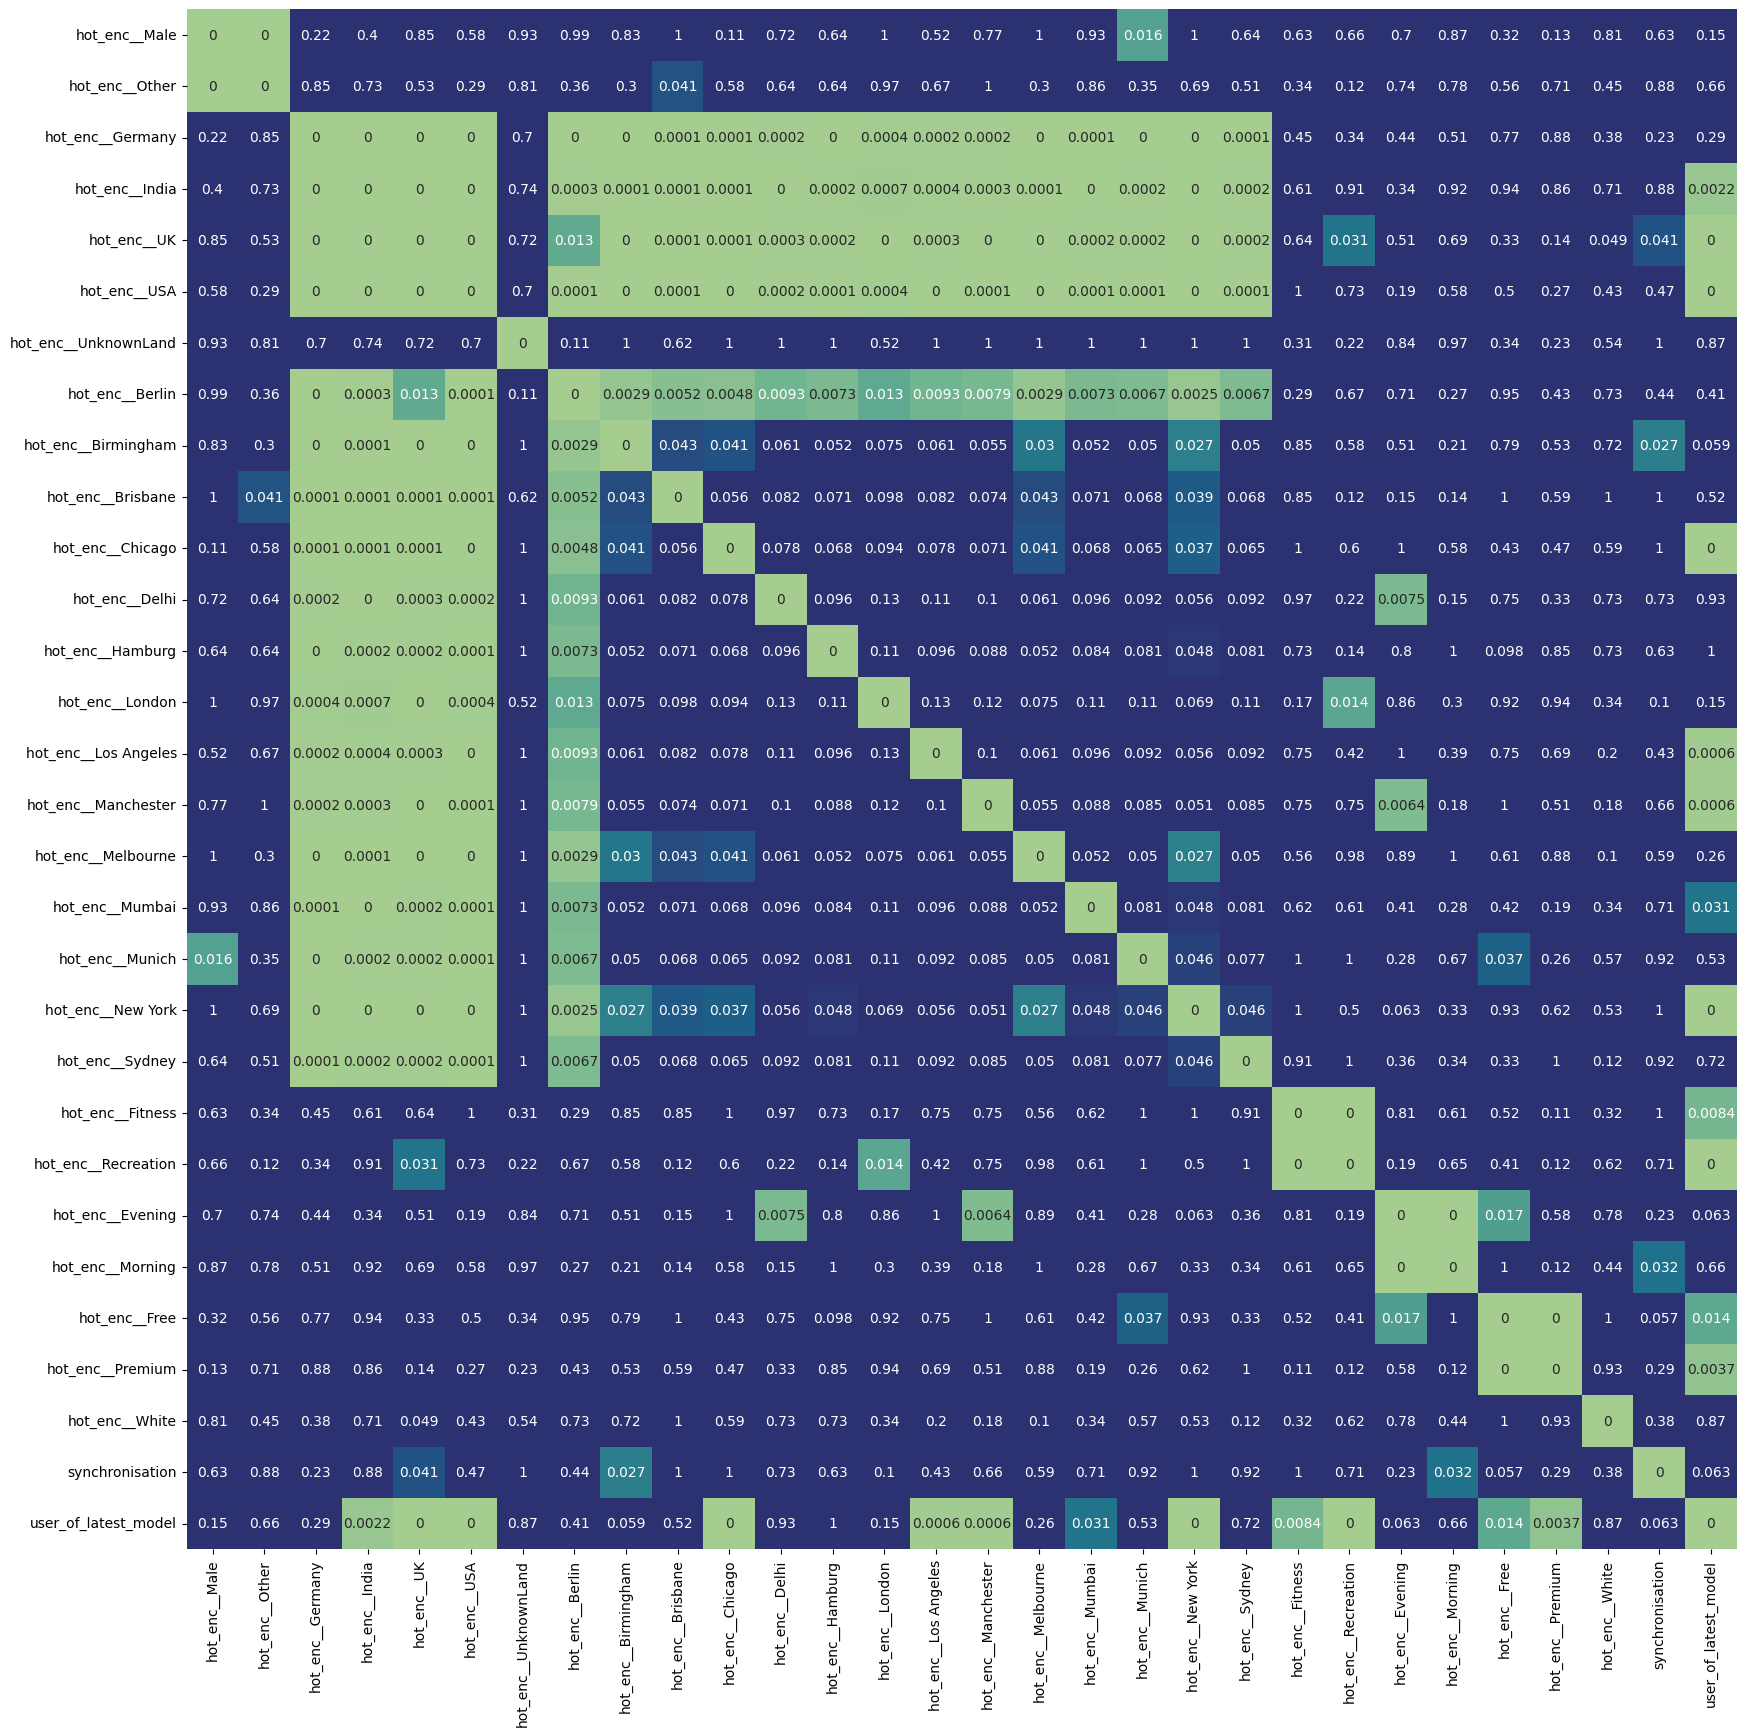

In [233]:
#display chi2 p-values as a color coded heatmap with a threshold of 0.05, round p-values to 2 digits
plt.figure(figsize=(20,20))
sns.heatmap(round(chi2_values.astype(float),4), annot=True, cmap='crest', cbar=False, vmin=0, vmax=0.05)

In [234]:
feat_selected_category_columns = list(chi2_values['user_of_latest_model'][chi2_values['user_of_latest_model']< 0.05].index)
feat_selected_category_columns.remove('user_of_latest_model')
feat_selected_category_columns

['hot_enc__India',
 'hot_enc__UK',
 'hot_enc__USA',
 'hot_enc__Chicago',
 'hot_enc__Los Angeles',
 'hot_enc__Manchester',
 'hot_enc__Mumbai',
 'hot_enc__New York',
 'hot_enc__Fitness',
 'hot_enc__Recreation',
 'hot_enc__Free',
 'hot_enc__Premium']

Analazing the correlation between the target column and the hot encoded columns using the chi-squared test we can identify that the categorical columns relevant for the model are (p_values < 0.05 ): 

['hot_enc__India',
 'hot_enc__UK',
 'hot_enc__USA',
 'hot_enc__Chicago',
 'hot_enc__Los Angeles',
 'hot_enc__Manchester',
 'hot_enc__Mumbai',
 'hot_enc__New York',
 'hot_enc__Fitness',
 'hot_enc__Recreation',
 'hot_enc__Free',
 'hot_enc__Premium']

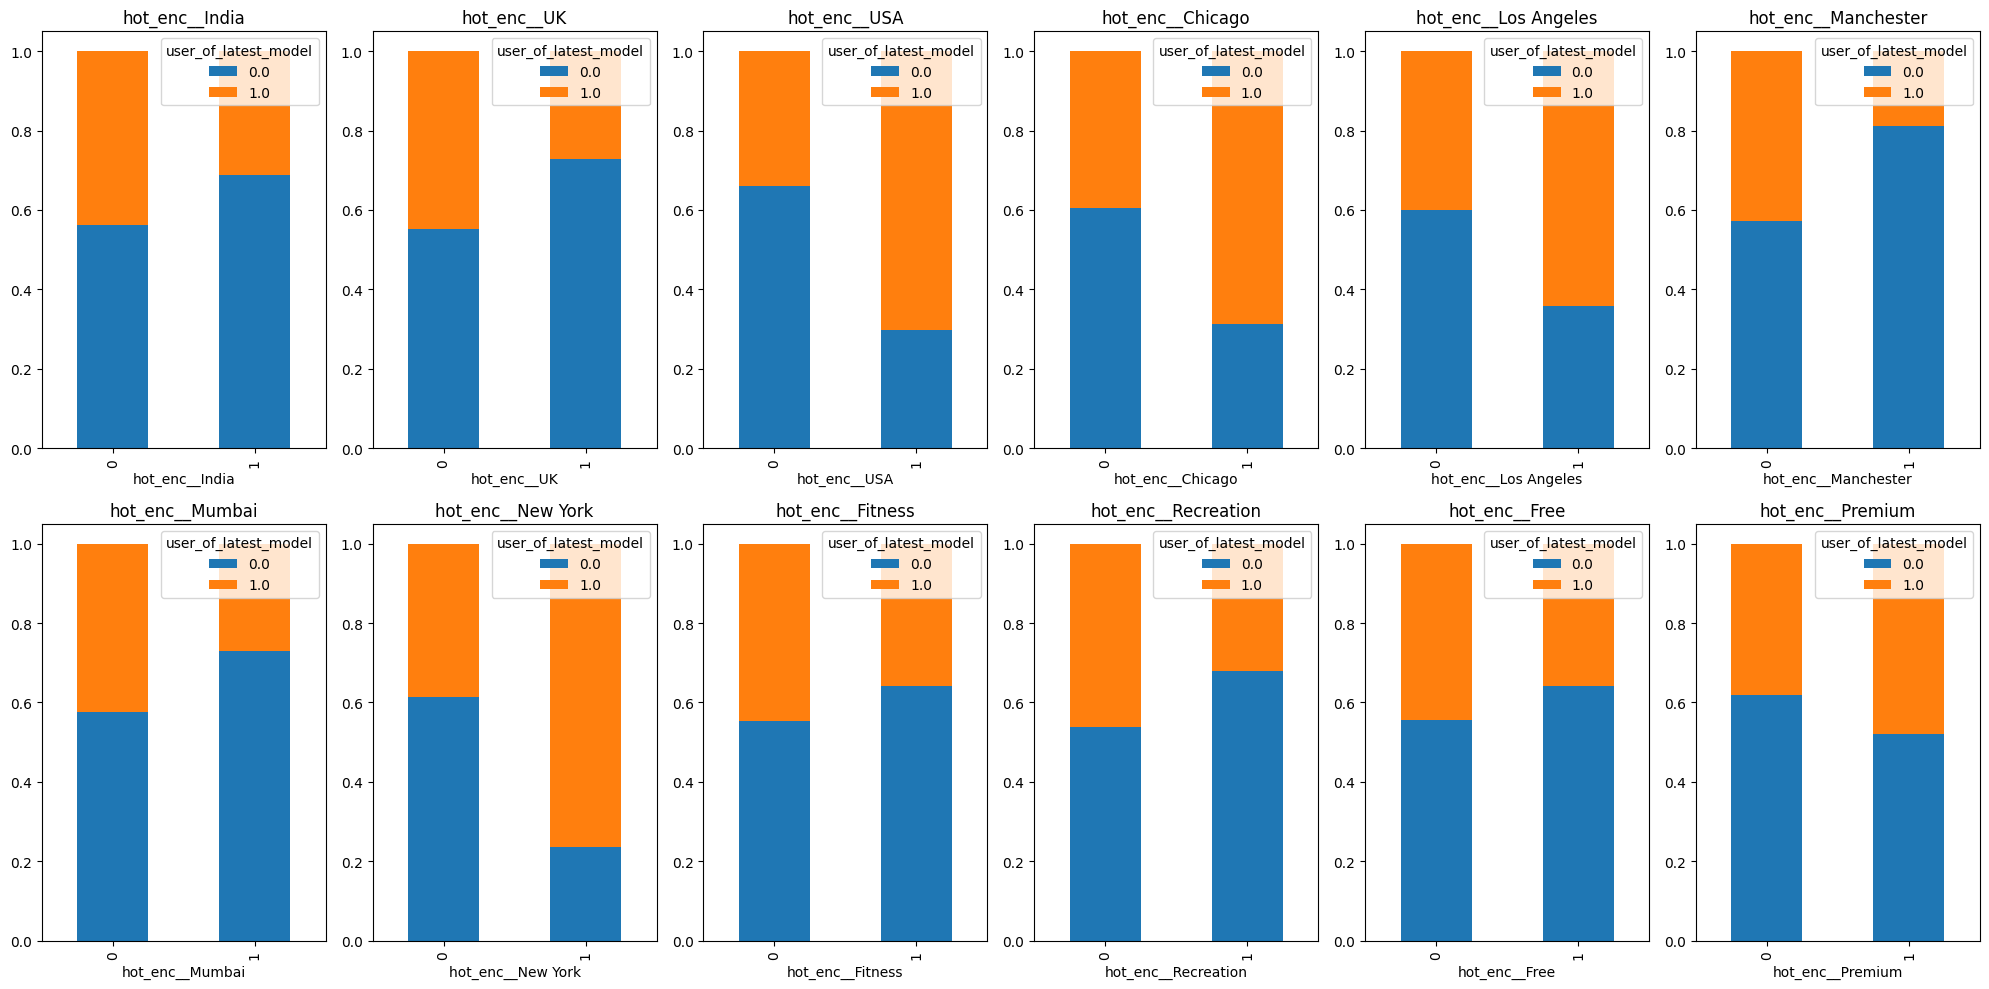

In [235]:
#create a stacked bar plot for relationship between selected categorical features and target

columns_of_interest = feat_selected_category_columns
fig, ax = plt.subplots(2, len(columns_of_interest)//2, figsize=(20, 10))
for idx, col in enumerate(columns_of_interest):
    data = pd.crosstab(df[col], df[target_columns[0]])
    data = data.div(data.sum(axis=1), axis=0)
    data.plot(kind='bar', stacked=True, ax=ax[idx//(len(columns_of_interest)//2), idx%(len(columns_of_interest)//2)], title=col)
fig.tight_layout()
plt.show()
    


In [256]:
#!pip install ydata_profiling

In [257]:
# from ydata_profiling import ProfileReport
# df = pd.read_csv("../../data/raw/triathlon_watch_training_data_final.csv")
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("EDA_Report.html")

In [356]:
df.to_csv("../../data/processed/triathlon_watch_training_preprocessed_john.csv", index=False)